<font color = 'blue'>
    <h1>Table of Content</h1>  

[Introduction](#0) 
    
1. [Importing Libraries](#1)
    * [Load and Reading the Data](#1a)
    * [Inspecting the Dataset](#1b)

    
2. [Data Cleaning and Manipulation](#2)
    * [Investigating Percentage of Null/Missing Values in both Datasets](#2a)
    * [Dropping columns with excess null/missing data + unecessary columns application_df](#2b)
    * [Dropping columns with excess null/missing data + unecessary columns previous_df](#2c)
    * [Standardizing Values for application_df](#2d)
    * [Standardizing Values for previous_df](#2e)
    * [Null Value Data Imputation application_df](#2f)
    * [Null Value Data Imputation previous_df](#2g)
    * [Outlier Detection the Datasets](#2h)
    
    
3. [Exploratory Data Analysis](#3)
    * [Analysing Repayer  vs Defaulter Counts](#3)
    * [Creating Plotting Function for Univariate, Bivariate, Multivariate for Categorical Variables Analysis](#3a)
    * [Categorical Variables Analysis](#3b)
    * [Numeric Variables Analysis](#3c)
    
        * [Numerical Univariate Analysis](#3d)
        * [Numerical Bivariate Analysi](#3e)
    * [Merged Dataframes Analysis](#3f)
        
        * [Univariate Analysis for Merged Data set](#3g)


4. [Conclusions](#4)
    
    * [Factors to conclude applicant will be a Repayer](#4a)

    * [Factors to conclude applicant will be a Defaulter](#4b)

<a id = "0"></a><br>

# Introduction

Lenders look at a variety of factors/measures in attempting to predict how risky a borrower might be, so that liabilities can be objectively valued and predicted to help protect the lender against financial loss. This Credit risk or loan defaulter segmentation analysis seeks to identify pattern which indicate if a loan applicant will will defalut or repay the loan instalments to reduce the likelihood of losing money to a borrower or denying eligible borrowers credit.

The Dataset:
The dataset contains 2 datasets. Application dataset is what we will use to make our conclusion and the Previous dataset will be used for credit history reference purpose.

<a id = "1"></a><br>
## Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
import seaborn as sns 
import itertools
import warnings

warnings.filterwarnings("ignore")

pd.options.display.max_columns = None
pd.options.display.max_rows = None

<a id = "1a"></a><br>
### Load and Reading the Dataset 

In [2]:
application_df = pd.read_csv(r"C:\Users\DAVID\Downloads\loan_default_analysis\application_data.csv")
previous_df = pd.read_csv(r"C:\Users\DAVID\Downloads\loan_default_analysis\previous_application.csv")

<a id = "1b"></a><br>
### Inspecting the Datasets

In [3]:
application_df.head(3)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   
2                       0                        0              Government   

   EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
0      0.083037      0.262949      0.139376          0.0247            0.0369   
1      0.311267      0.622246           NaN          0.0959            0.0529   
2           NaN      0.555912      0.729567             NaN               NaN   

   YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  \
0                       0.9722           0.6192          0.0143   
1                       0.9851           0.7960          0.0605   
2                          NaN              NaN             NaN   

   ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  \
0     

In [4]:
previous_df.head(3)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   

   DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0           -42.0                      300.0          -42.0             -37.0   
1          -134.0                      916.0       365243.0          365243.0   
2          -271.0                       59.0       365243.0          365243.0   

   NFLAG_INSURED_ON_APPROVAL  
0                        0.0  
1                        1.0  
2                        1.0

In [5]:
print('application_data                     :',application_df.shape)
print('previous_application                 :',previous_df.shape)

print('application_data_size                :',application_df.size)
print('previous_application_data-size       :',previous_df.size)

application_data                     : (307511, 122)
previous_application                 : (1670214, 37)
application_data_size                : 37516342
previous_application_data-size       : 61797918


In [6]:
application_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [7]:
previous_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [8]:
application_df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [9]:
previous_df.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115833    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

<a id = "2"></a><br>
## Data Cleaning and Manipulation

<a id = "2a"></a><br>
### Investigating Percentage of Null/Missing Values in both Datasets 

In [10]:
#Investigating the percentage of missing values in application_data dataset

null_application = round(application_df.isnull().sum().sort_values(ascending=False)/application_df.shape[0]*100,2).reset_index().rename(columns={'index':'column_name', 0:'percent_missing'})
null_application

column_name  percent_missing
0                 COMMONAREA_MEDI            69.87
1                  COMMONAREA_AVG            69.87
2                 COMMONAREA_MODE            69.87
3        NONLIVINGAPARTMENTS_MODE            69.43
4         NONLIVINGAPARTMENTS_AVG            69.43
5        NONLIVINGAPARTMENTS_MEDI            69.43
6              FONDKAPREMONT_MODE            68.39
7           LIVINGAPARTMENTS_MODE            68.35
8            LIVINGAPARTMENTS_AVG            68.35
9           LIVINGAPARTMENTS_MEDI            68.35
10                  FLOORSMIN_AVG            67.85
11                 FLOORSMIN_MODE            67.85
12                 FLOORSMIN_MEDI            67.85
13               YEARS_BUILD_MEDI            66.50
14               YEARS_BUILD_MODE            66.50
15                YEARS_BUILD_AVG            66.50
16                    OWN_CAR_AGE            65.99
17                  LANDAREA_MEDI            59.38
18                  LANDAREA_MODE            59.38
19                   LANDAREA_AVG            59.38
20              BASEMENTAREA_MEDI            58.52
21               BASEMENTAREA_AVG            58.52
22              BASEMENTAREA_MODE            58.52
23                   EXT_SOURCE_1            56.38
24             NONLIVINGAREA_MODE            55.18
25              NONLIVINGAREA_AVG            55.18
26             NONLIVINGAREA_MEDI            55.18
27                 ELEVATORS_MEDI            53.30
28                  ELEVATORS_AVG            53.30
29                 ELEVATORS_MODE            53.30
30             WALLSMATERIAL_MODE            50.84
31                APARTMENTS_MEDI            50.75
32                 APARTMENTS_AVG            50.75
33                APARTMENTS_MODE            50.75
34                 ENTRANCES_MEDI            50.35
35                  ENTRANCES_AVG            50.35
36                 ENTRANCES_MODE            50.35
37                 LIVINGAREA_AVG            50.19
38                LIVINGAREA_MODE            50.19
39                LIVINGAREA_MEDI            50.19
40                 HOUSETYPE_MODE            50.18
41                 FLOORSMAX_MODE            49.76
42                 FLOORSMAX_MEDI            49.76
43                  FLOORSMAX_AVG            49.76
44   YEARS_BEGINEXPLUATATION_MODE            48.78
45   YEARS_BEGINEXPLUATATION_MEDI            48.78
46    YEARS_BEGINEXPLUATATION_AVG            48.78
47                 TOTALAREA_MODE            48.27
48            EMERGENCYSTATE_MODE            47.40
49                OCCUPATION_TYPE            31.35
50                   EXT_SOURCE_3            19.83
51     AMT_REQ_CREDIT_BUREAU_HOUR            13.50
52      AMT_REQ_CREDIT_BUREAU_DAY            13.50
53     AMT_REQ_CREDIT_BUREAU_WEEK            13.50
54      AMT_REQ_CREDIT_BUREAU_MON            13.50
55      AMT_REQ_CREDIT_BUREAU_QRT            13.50
56     AMT_REQ_CREDIT_BUREAU_YEAR            13.50
57                NAME_TYPE_SUITE             0.42
58       OBS_30_CNT_SOCIAL_CIRCLE             0.33
59       DEF_30_CNT_SOCIAL_CIRCLE             0.33
60       OBS_60_CNT_SOCIAL_CIRCLE             0.33
61       DEF_60_CNT_SOCIAL_CIRCLE             0.33
62                   EXT_SOURCE_2             0.21
63                AMT_GOODS_PRICE             0.09
64                    AMT_ANNUITY             0.00
65                CNT_FAM_MEMBERS             0.00
66         DAYS_LAST_PHONE_CHANGE             0.00
67                   CNT_CHILDREN             0.00
68                FLAG_DOCUMENT_8             0.00
69             NAME_CONTRACT_TYPE             0.00
70                    CODE_GENDER             0.00
71                   FLAG_OWN_CAR             0.00
72                FLAG_DOCUMENT_2             0.00
73                FLAG_DOCUMENT_3             0.00
74                FLAG_DOCUMENT_4             0.00
75                FLAG_DOCUMENT_5             0.00
76                FLAG_DOCUMENT_6             0.00
77                FLAG_DOCUMENT_7           

In [11]:
#Columns with missing data greater that 40%

null_application_40 = null_application[null_application['percent_missing']>=40]
null_application_40

column_name  percent_missing
0                COMMONAREA_MEDI            69.87
1                 COMMONAREA_AVG            69.87
2                COMMONAREA_MODE            69.87
3       NONLIVINGAPARTMENTS_MODE            69.43
4        NONLIVINGAPARTMENTS_AVG            69.43
5       NONLIVINGAPARTMENTS_MEDI            69.43
6             FONDKAPREMONT_MODE            68.39
7          LIVINGAPARTMENTS_MODE            68.35
8           LIVINGAPARTMENTS_AVG            68.35
9          LIVINGAPARTMENTS_MEDI            68.35
10                 FLOORSMIN_AVG            67.85
11                FLOORSMIN_MODE            67.85
12                FLOORSMIN_MEDI            67.85
13              YEARS_BUILD_MEDI            66.50
14              YEARS_BUILD_MODE            66.50
15               YEARS_BUILD_AVG            66.50
16                   OWN_CAR_AGE            65.99
17                 LANDAREA_MEDI            59.38
18                 LANDAREA_MODE            59.38
19                  LANDAREA_AVG            59.38
20             BASEMENTAREA_MEDI            58.52
21              BASEMENTAREA_AVG            58.52
22             BASEMENTAREA_MODE            58.52
23                  EXT_SOURCE_1            56.38
24            NONLIVINGAREA_MODE            55.18
25             NONLIVINGAREA_AVG            55.18
26            NONLIVINGAREA_MEDI            55.18
27                ELEVATORS_MEDI            53.30
28                 ELEVATORS_AVG            53.30
29                ELEVATORS_MODE            53.30
30            WALLSMATERIAL_MODE            50.84
31               APARTMENTS_MEDI            50.75
32                APARTMENTS_AVG            50.75
33               APARTMENTS_MODE            50.75
34                ENTRANCES_MEDI            50.35
35                 ENTRANCES_AVG            50.35
36                ENTRANCES_MODE            50.35
37                LIVINGAREA_AVG            50.19
38               LIVINGAREA_MODE            50.19
39               LIVINGAREA_MEDI            50.19
40                HOUSETYPE_MODE            50.18
41                FLOORSMAX_MODE            49.76
42                FLOORSMAX_MEDI            49.76
43                 FLOORSMAX_AVG            49.76
44  YEARS_BEGINEXPLUATATION_MODE            48.78
45  YEARS_BEGINEXPLUATATION_MEDI            48.78
46   YEARS_BEGINEXPLUATATION_AVG            48.78
47                TOTALAREA_MODE            48.27
48           EMERGENCYSTATE_MODE            47.40

In [12]:
len(null_application_40)

49

In [13]:
# checking the null value % of each column in previousDF dataframe
round(previous_df.isnull().sum() / previous_df.shape[0] * 100.00,2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [14]:
#Investigating the percentage of missing values in previous application_data dataset

null_previous = round(previous_df.isnull().sum().sort_values(ascending=False)/previous_df.shape[0]*100,2).reset_index().rename(columns={'index':'column_name', 0:'percent_missing'})
null_previous

column_name  percent_missing
0      RATE_INTEREST_PRIVILEGED            99.64
1         RATE_INTEREST_PRIMARY            99.64
2              AMT_DOWN_PAYMENT            53.64
3             RATE_DOWN_PAYMENT            53.64
4               NAME_TYPE_SUITE            49.12
5     NFLAG_INSURED_ON_APPROVAL            40.30
6              DAYS_TERMINATION            40.30
7                 DAYS_LAST_DUE            40.30
8     DAYS_LAST_DUE_1ST_VERSION            40.30
9                DAYS_FIRST_DUE            40.30
10           DAYS_FIRST_DRAWING            40.30
11              AMT_GOODS_PRICE            23.08
12                  AMT_ANNUITY            22.29
13                  CNT_PAYMENT            22.29
14          PRODUCT_COMBINATION             0.02
15                   AMT_CREDIT             0.00
16             NAME_YIELD_GROUP             0.00
17               NAME_PORTFOLIO             0.00
18         NAME_SELLER_INDUSTRY             0.00
19             SELLERPLACE_AREA             0.00
20                 CHANNEL_TYPE             0.00
21            NAME_PRODUCT_TYPE             0.00
22                   SK_ID_PREV             0.00
23          NAME_GOODS_CATEGORY             0.00
24             NAME_CLIENT_TYPE             0.00
25           CODE_REJECT_REASON             0.00
26                   SK_ID_CURR             0.00
27                DAYS_DECISION             0.00
28         NAME_CONTRACT_STATUS             0.00
29       NAME_CASH_LOAN_PURPOSE             0.00
30       NFLAG_LAST_APPL_IN_DAY             0.00
31  FLAG_LAST_APPL_PER_CONTRACT             0.00
32      HOUR_APPR_PROCESS_START             0.00
33   WEEKDAY_APPR_PROCESS_START             0.00
34              AMT_APPLICATION             0.00
35           NAME_CONTRACT_TYPE             0.00
36            NAME_PAYMENT_TYPE             0.00

In [15]:
#Columns with missing data greater that 40%

null_previous_40 = null_previous[null_previous['percent_missing']>=40]
null_previous_40

column_name  percent_missing
0    RATE_INTEREST_PRIVILEGED            99.64
1       RATE_INTEREST_PRIMARY            99.64
2            AMT_DOWN_PAYMENT            53.64
3           RATE_DOWN_PAYMENT            53.64
4             NAME_TYPE_SUITE            49.12
5   NFLAG_INSURED_ON_APPROVAL            40.30
6            DAYS_TERMINATION            40.30
7               DAYS_LAST_DUE            40.30
8   DAYS_LAST_DUE_1ST_VERSION            40.30
9              DAYS_FIRST_DUE            40.30
10         DAYS_FIRST_DRAWING            40.30

In [16]:
len(null_previous_40)

11

<a id = "2b"></a><br>
### Dropping columns with excess null/missing data + unecessary columns application_df

In [17]:
#Analyzing and deleting unecessary columns in application_df dataframe

#Checking the correlation between EXT_SOURCE_  columns and TARGETcolumn

Corr_1 = application_df[["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3","TARGET"]]
Corr_1.corr()

EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3    TARGET
EXT_SOURCE_1      1.000000      0.213982      0.186846 -0.155317
EXT_SOURCE_2      0.213982      1.000000      0.109167 -0.160472
EXT_SOURCE_3      0.186846      0.109167      1.000000 -0.178919
TARGET           -0.155317     -0.160472     -0.178919  1.000000

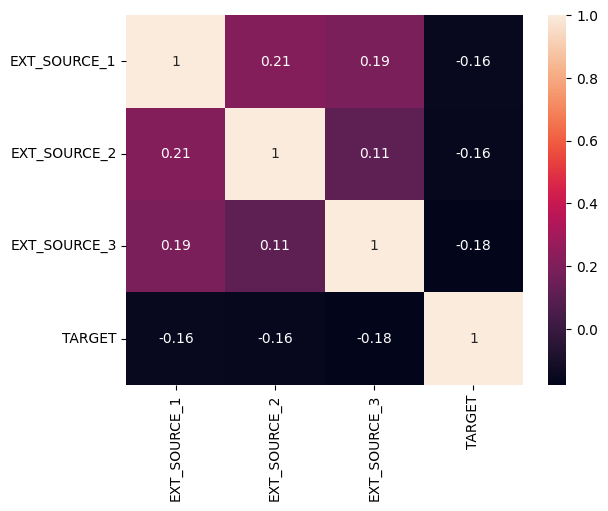

In [18]:
ax = sns.heatmap(Corr_1.corr(),annot=True)

From the Heatmap, there seems to be no correlation between EXT_SOURCE_X columns and target column, we will add these columns to the list of coulmns to be dropped

In [19]:
#Creating a list of columns that will be dropped
del_application=null_application_40['column_name'].to_list() + ['EXT_SOURCE_2', 'EXT_SOURCE_3']
len(del_application)

51

In [20]:
#Analyzing and deleting unecessary columns in application_df dataframe


#Checking the relation between #FLAG_DOCUMENT_  columns and TARGET column

flag_doc_col = []

for col in application_df:
    if col.startswith('FLAG_DOCUMENT_'):
        flag_doc_col.append(col)

flag_doc_col

['FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

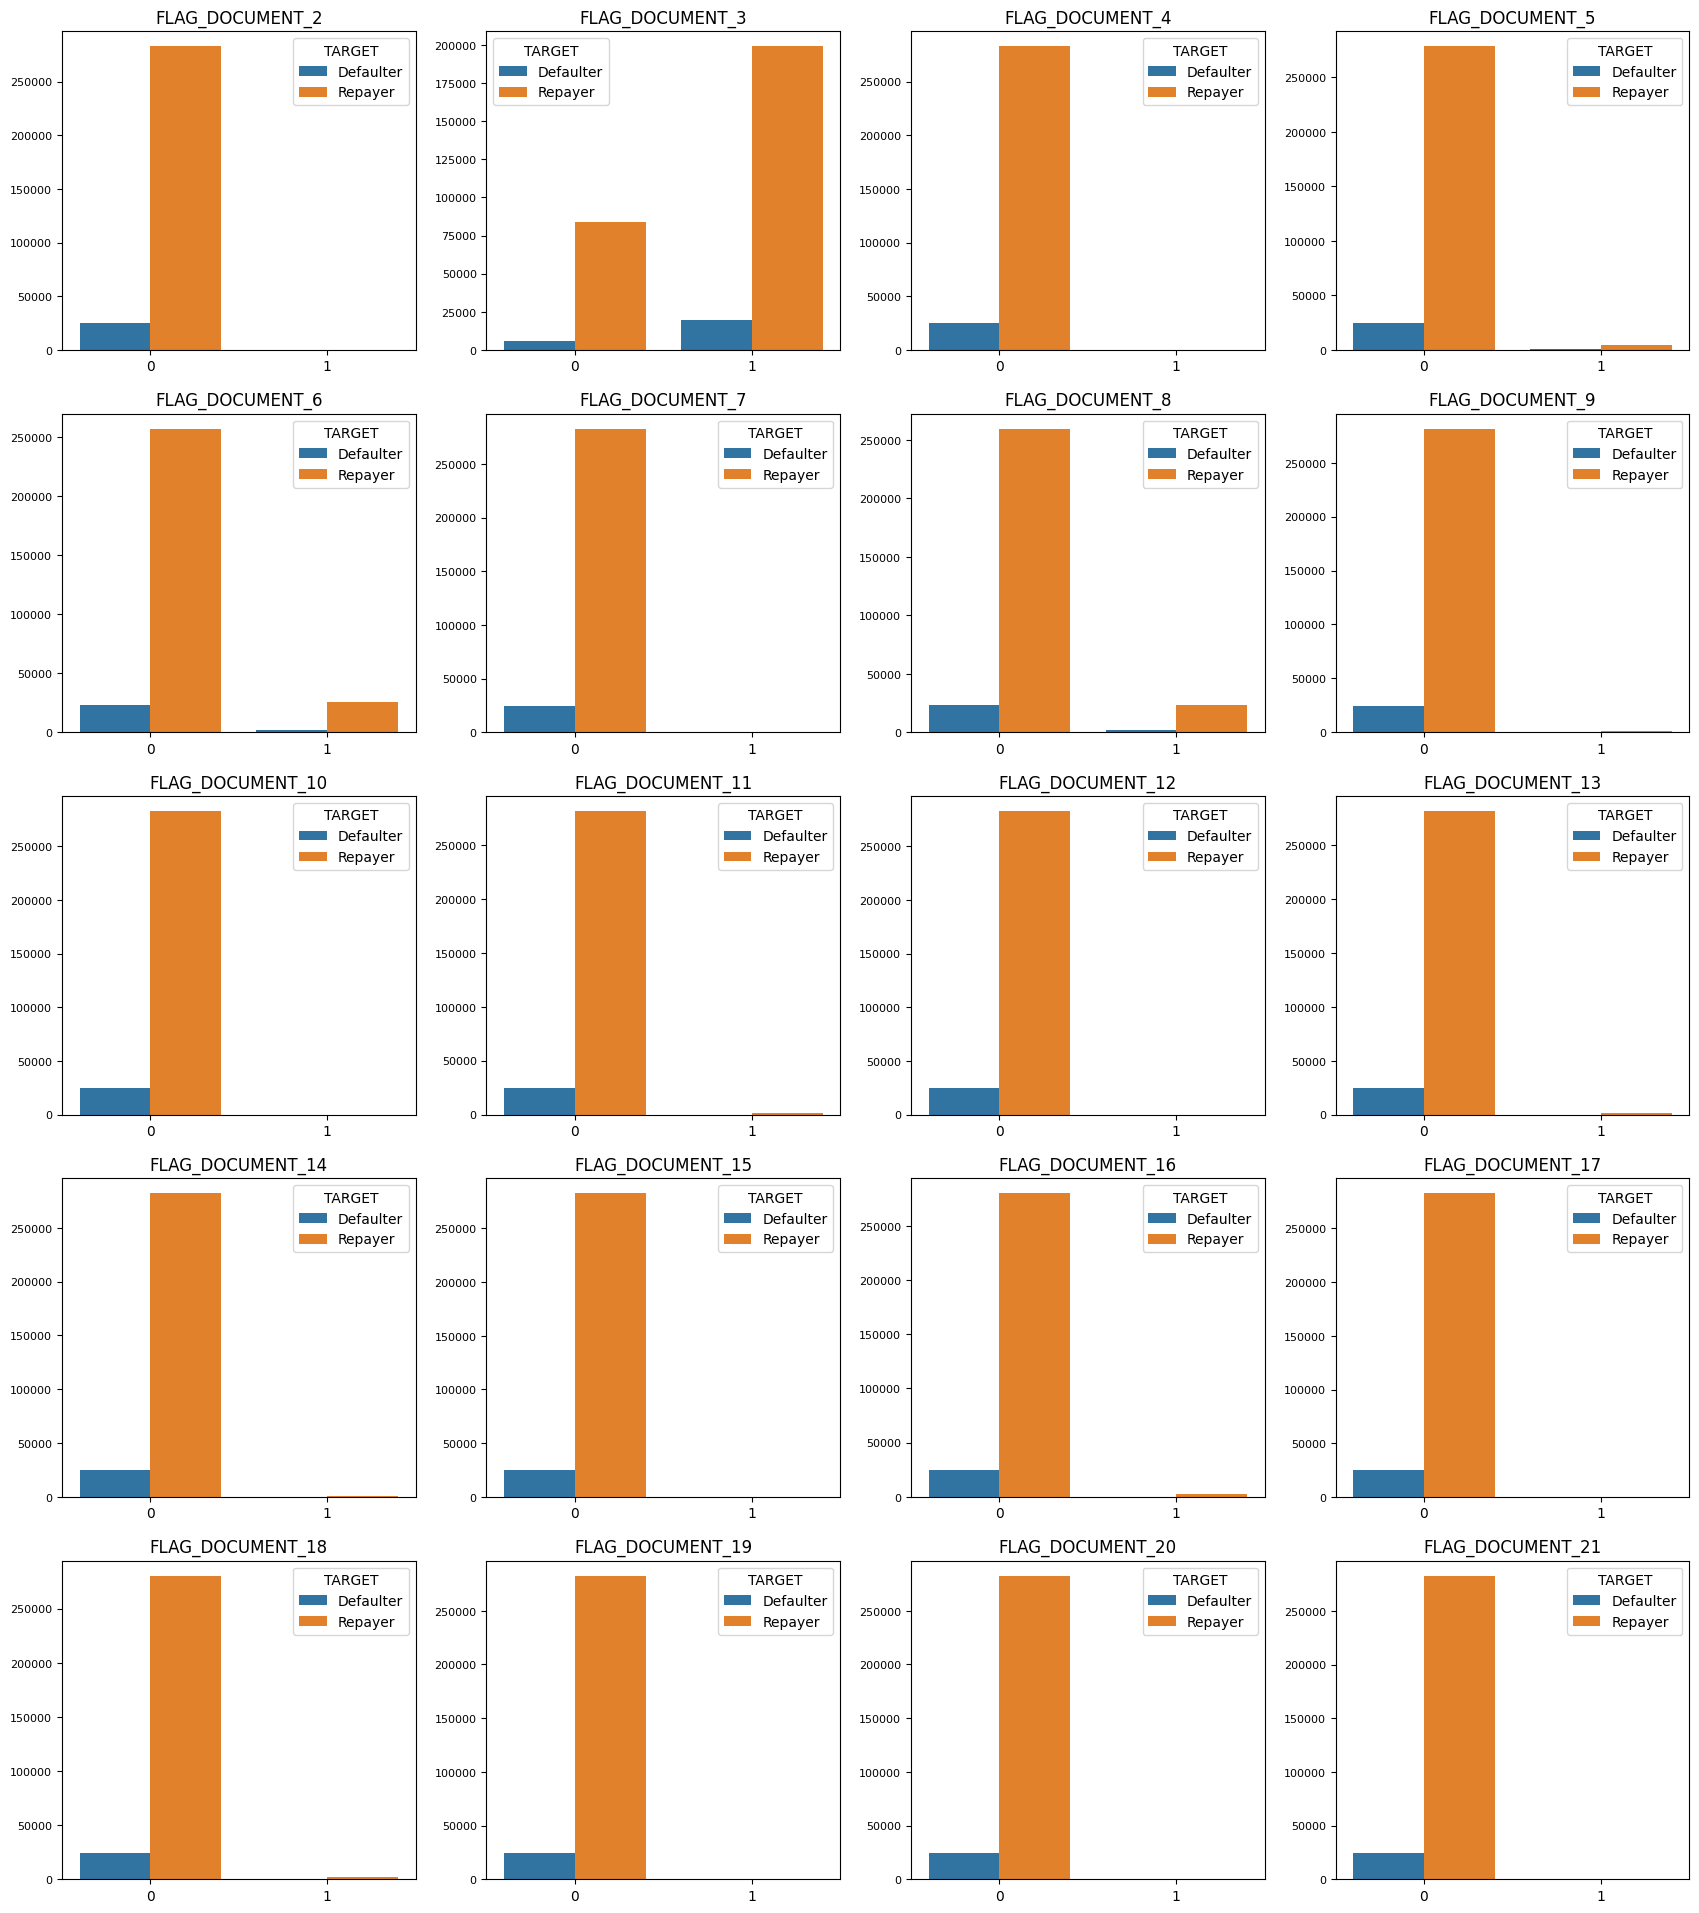

In [21]:
flag_col=['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7',
           'FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
           'FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19',
           'FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']

flag_col_df = application_df[flag_col+['TARGET']]

length = len(flag_col)

flag_col_df['TARGET']=flag_col_df['TARGET'].replace({0:'Repayer',1:'Defaulter'})

fig=plt.figure(figsize=(21,24))

for i,j in itertools.zip_longest(flag_col,range(length)):
    plt.subplot(5,4,j+1)
    ax = sns.countplot(x=flag_col_df[i],hue=flag_col_df["TARGET"])
    plt.yticks(fontsize=8)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)




In [22]:
#adding unecessary 'FLAG_DOCUMENT_' columns to columns to that will be dropped 
flag_col.remove('FLAG_DOCUMENT_3')
del_application=del_application+flag_col
len(del_application)

70

#### Contact columns

In [23]:
#Analyzing and deleting unecessary columns in application_df dataframe

# Analyzing if there is relation between mobile phone, work phone etc, email columns and TARGET column.

#CONTACT_  columns


con_col = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','TARGET']

Contact_col=application_df[con_col].corr()
Contact_col

FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
FLAG_MOBIL          1.000000       -0.000845         0.000900   
FLAG_EMP_PHONE     -0.000845        1.000000         0.233801   
FLAG_WORK_PHONE     0.000900        0.233801         1.000000   
FLAG_CONT_MOBILE   -0.000078       -0.012819         0.021580   
FLAG_PHONE          0.001128       -0.016131         0.293105   
FLAG_EMAIL          0.000442        0.062542        -0.011520   
TARGET              0.000534        0.045982         0.028524   

                  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL    TARGET  
FLAG_MOBIL               -0.000078    0.001128    0.000442  0.000534  
FLAG_EMP_PHONE           -0.012819   -0.016131    0.062542  0.045982  
FLAG_WORK_PHONE           0.021580    0.293105   -0.011520  0.028524  
FLAG_CONT_MOBILE          1.000000    0.006257   -0.005356  0.000370  
FLAG_PHONE                0.006257    1.000000    0.014657 -0.023806  
FLAG_EMAIL               -0.005356    0.014657    1.000000 -0.001758  
TARGET                    0.000370   -0.023806   -0.001758  1.000000

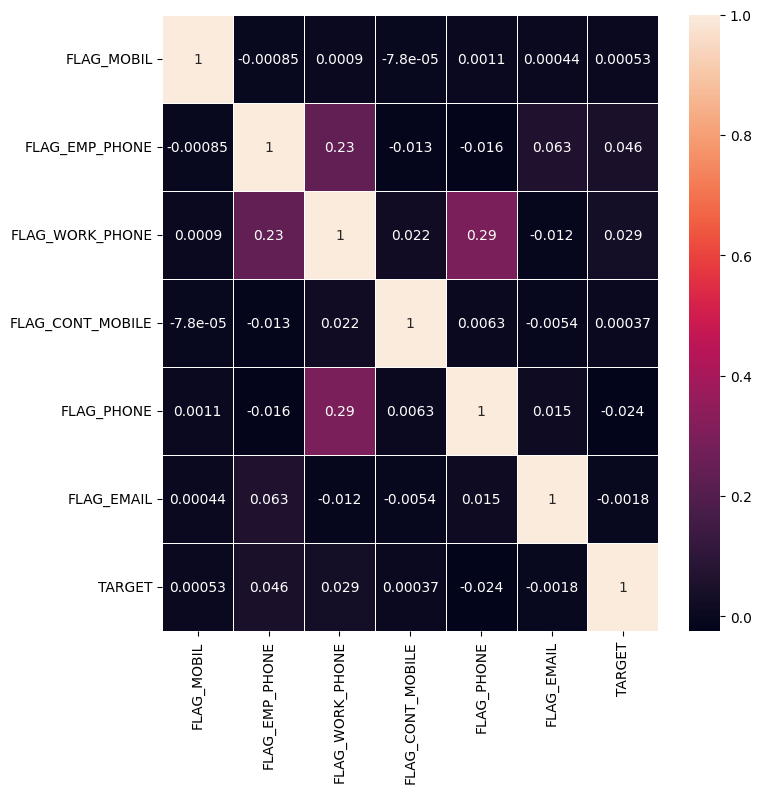

In [24]:
fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(data=Contact_col,
                xticklabels=Contact_col.columns,
                yticklabels=Contact_col.columns,
                linewidths=0.5,
                linecolor='white',
                annot=True)

No correlation between 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','FLAG_PHONE', 'FLAG_EMAIL' 
with 'TARGET' ; thus these columns will be deleted

In [25]:
con_col.remove('TARGET')
del_application=del_application+con_col
len(del_application)

76

In [26]:
# Dropping the unnecessary columns from application_df
application_df.drop(labels=del_application,axis=1,inplace=True)

A total 76 columns has been dropped from the application_df 

In [27]:
# checking application_df datafra,e after dropping unnecessary columns

application_df.shape

(307511, 46)

In [28]:
# inspecting the column types after removal of unnecessary columns
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

There are 46 columns remaining in application_df dataframe

<a id = "2c"></a><br>
### Dropping columns with excess null/missing data + unecessary columns previous_df

In [29]:
del_previous=null_previous_40['column_name'].to_list()
del_previous

['RATE_INTEREST_PRIVILEGED',
 'RATE_INTEREST_PRIMARY',
 'AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'NAME_TYPE_SUITE',
 'NFLAG_INSURED_ON_APPROVAL',
 'DAYS_TERMINATION',
 'DAYS_LAST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_FIRST_DUE',
 'DAYS_FIRST_DRAWING']

In [30]:
#listing our more unecessary columns

irrelevant_col  = ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START',
                        'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']

In [31]:
del_previous=del_previous+irrelevant_col
len(del_previous)

15

A total of 15 columns will be dropped in previous_application dataframe 

In [32]:
# Dropping the unnecessary columns from previous_df
previous_df.drop(labels=del_previous,axis=1,inplace=True)
previous_df.shape

(1670214, 22)

In [33]:
previous_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 22 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_PREV              1670214 non-null  int64  
 1   SK_ID_CURR              1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE      1670214 non-null  object 
 3   AMT_ANNUITY             1297979 non-null  float64
 4   AMT_APPLICATION         1670214 non-null  float64
 5   AMT_CREDIT              1670213 non-null  float64
 6   AMT_GOODS_PRICE         1284699 non-null  float64
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  object 
 8   NAME_CONTRACT_STATUS    1670214 non-null  object 
 9   DAYS_DECISION           1670214 non-null  int64  
 10  NAME_PAYMENT_TYPE       1670214 non-null  object 
 11  CODE_REJECT_REASON      1670214 non-null  object 
 12  NAME_CLIENT_TYPE        1670214 non-null  object 
 13  NAME_GOODS_CATEGORY     1670214 non-null  object 
 14  NA

A total of 22 columns left for analysis for previous_df dataframe

<a id = "2d"></a><br>

### Standardizing Values for application_df

Tasks

1. Converting negative columns 'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH' to positive numbers
2. Creating bins for ['AMT_INCOME_TOTAL'], ['AMT_CREDIT'] 
3. Creating ['AGE'] & ['YEARS_EMPLOYED'] columns using ['DAYS_BIRTH'] & ['DAYS_EMPLOYED'] & binning ['AGE'] & ['YEARS_EMPLOYED']

In [34]:
convert_col = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']

for col in convert_col:
    application_df[convert_col]=abs(application_df[convert_col])
    
    
#days_col = []

#for col in updated:
#    if col.startswith('DAYS_'):
#        days_col.append(col)
        
#days_col

#for col in days_col:
#    updated[col] = abs(updated[col])

In [35]:
application_df['AMT_INCOME_TOTAL'].agg(func=['mean', 'median', 'max'])

mean      1.687979e+05
median    1.471500e+05
max       1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [36]:
print('AMT_INCOME_TOTAL')
print('mean                     :',application_df['AMT_INCOME_TOTAL'].mean())
print('median                   :',application_df['AMT_INCOME_TOTAL'].median())
print('mode                     :',application_df['AMT_INCOME_TOTAL'].mode()[0])
print('min                      :',application_df['AMT_INCOME_TOTAL'].min())
print('max                      :',application_df['AMT_INCOME_TOTAL'].max())

AMT_INCOME_TOTAL
mean                     : 168797.9192969845
median                   : 147150.0
mode                     : 135000.0
min                      : 25650.0
max                      : 117000000.0


In [37]:
# BININNG ['AMT_INCOME_TOTAL'] column

application_df['AMT_INCOME_TOTAL'].quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99])

bins = [0,100000,150000,200000,250000,300000,350000,400000,450000,500000,550000,117000000]

ranges = ['0-100k', '100-200k', '200-300k', '300k-400k', '400k-500k', '500k-600k', '600k-700k', 
          '700k-800k', '800k-900k', '900k-1M', 'Above 1M']

application_df['AMT_INCOME_TOTAL_RANGE'] = pd.cut(application_df['AMT_INCOME_TOTAL'], bins, labels=ranges)

In [38]:
application_df.groupby(['AMT_INCOME_TOTAL_RANGE']).size()

AMT_INCOME_TOTAL_RANGE
0-100k       63698
100-200k     91591
200-300k     64307
300k-400k    48137
400k-500k    17039
500k-600k     8874
600k-700k     5802
700k-800k     4924
800k-900k      437
900k-1M        835
Above 1M      1867
dtype: int64

In [39]:
application_df['AMT_INCOME_TOTAL_RANGE'].value_counts(normalize=True)*100

100-200k     29.784626
200-300k     20.912097
0-100k       20.714056
300k-400k    15.653749
400k-500k     5.540940
500k-600k     2.885750
600k-700k     1.886762
700k-800k     1.601244
Above 1M      0.607133
900k-1M       0.271535
800k-900k     0.142109
Name: AMT_INCOME_TOTAL_RANGE, dtype: float64

More than 50% of the loan applicants have income ranging from 100K-200K. Almost 88% of loan applicants have income less than 300K

In [40]:
print('AMT_CREDIT')
print('mean                     :',application_df['AMT_CREDIT'].mean())
print('median                   :',application_df['AMT_CREDIT'].median())
print('mode                     :',application_df['AMT_CREDIT'].mode()[0])
print('min                      :',application_df['AMT_CREDIT'].min())
print('max                      :',application_df['AMT_CREDIT'].max())

AMT_CREDIT
mean                     : 599025.9997057016
median                   : 513531.0
mode                     : 450000.0
min                      : 45000.0
max                      : 4050000.0


In [41]:
# BININNG ['AMT_CREDIT'] column

application_df['AMT_CREDIT'].quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99])

bins = [0, 100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000,4050000.0]

ranges = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k',
       '800k-900k','900k-1M', '1M Above']

application_df['AMT_CREDIT_RANGE'] = pd.cut(application_df['AMT_CREDIT'], bins, labels=ranges)

In [42]:
application_df.groupby(['AMT_CREDIT_RANGE']).size()

AMT_CREDIT_RANGE
0-100K        6004
100K-200K    30140
200k-300k    54813
300k-400k    26338
400k-500k    32038
500k-600k    34232
600k-700k    24049
700k-800k    19193
800k-900k    21792
900k-1M       8927
1M Above     49985
dtype: int64

In [43]:
application_df['AMT_CREDIT_RANGE'].value_counts(normalize=True)*100

200k-300k    17.824728
1M Above     16.254703
500k-600k    11.131960
400k-500k    10.418489
100K-200K     9.801275
300k-400k     8.564897
600k-700k     7.820533
800k-900k     7.086576
700k-800k     6.241403
900k-1M       2.902986
0-100K        1.952450
Name: AMT_CREDIT_RANGE, dtype: float64

More Than 16% of the loan applicants have taken loan amount more than 1M

In [44]:
print('DAYS_BIRTH')
print('mean                     :',application_df['DAYS_BIRTH'].mean())
print('median                   :',application_df['DAYS_BIRTH'].median())
print('mode                     :',application_df['DAYS_BIRTH'].mode()[0])
print('min                      :',application_df['DAYS_BIRTH'].min())
print('max                      :',application_df['DAYS_BIRTH'].max())

DAYS_BIRTH
mean                     : 16036.995066843137
median                   : 15750.0
mode                     : 13749
min                      : 7489
max                      : 25229


In [45]:
# CREATING AGE COLUMN USING ['DAYS_BIRTH'] COLUMN AND BINNING AGE

application_df['AGE']=application_df['DAYS_BIRTH']//365

print('AGE')
print('mean                     :',application_df['AGE'].mean())
print('median                   :',application_df['AGE'].median())
print('mode                     :',application_df['AGE'].mode()[0])
print('min                      :',application_df['AGE'].min())
print('max                      :',application_df['AGE'].max())

application_df['AGE'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.81,0.85,0.9,0.95,0.99])
bins = [0, 20,30,40,50,100]

ranges = ['0-20YR','20-30YR', '30-40YR','40-50YR','Above-50YR']

application_df['AGE_RANGE'] = pd.cut(application_df['AGE'], bins, labels=ranges)



AGE
mean                     : 43.43596814422899
median                   : 43.0
mode                     : 38
min                      : 20
max                      : 69


In [46]:
application_df.groupby(['AGE_RANGE']).size()

AGE_RANGE
0-20YR            1
20-30YR       52805
30-40YR       83117
40-50YR       74401
Above-50YR    97187
dtype: int64

In [47]:
application_df['AGE_RANGE'].value_counts(normalize=True)

Above-50YR    0.316044
30-40YR       0.270290
40-50YR       0.241946
20-30YR       0.171717
0-20YR        0.000003
Name: AGE_RANGE, dtype: float64

31% of loan applicants have age above 50 years. More than 55% of loan applicants have age over 40 years.

In [48]:
# CREATING []'YEARS_EMPLOYED'] COLUMN USING ['DAYS_EMPLOYED'] COLUMN AND BINNING AGE

application_df['YEARS_EMPLOYED']=application_df['DAYS_EMPLOYED']//365

print('YEARS_EMPLOYED')
print('mean                     :',application_df['YEARS_EMPLOYED'].mean())
print('median                   :',application_df['YEARS_EMPLOYED'].median())
print('mode                     :',application_df['YEARS_EMPLOYED'].mode()[0])
print('min                      :',application_df['YEARS_EMPLOYED'].min())
print('max                      :',application_df['YEARS_EMPLOYED'].max())

application_df['YEARS_EMPLOYED'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.81,0.85,0.9,0.95,0.99])
bins = [0, 5,10,20,30,40,50,100,150]

ranges = ['0-5YR', '5-10YR', '10-20YR','20-30YR', '30-40YR','40-50YR','50-60YR','Above-60YR']

application_df['YEARS_EMPLOYED_RANGE'] = pd.cut(application_df['YEARS_EMPLOYED'], bins, labels=ranges)



YEARS_EMPLOYED
mean                     : 185.02152118135612
median                   : 6.0
mode                     : 1000
min                      : 0
max                      : 1000


In [49]:
application_df.groupby('YEARS_EMPLOYED_RANGE').size()

YEARS_EMPLOYED_RANGE
0-5YR         124634
5-10YR         55983
10-20YR        32658
20-30YR         8409
30-40YR         2374
40-50YR          175
50-60YR            0
Above-60YR         0
dtype: int64

In [50]:
application_df['YEARS_EMPLOYED_RANGE'].value_counts(normalize=True)

0-5YR         0.555824
5-10YR        0.249664
10-20YR       0.145643
20-30YR       0.037501
30-40YR       0.010587
40-50YR       0.000780
50-60YR       0.000000
Above-60YR    0.000000
Name: YEARS_EMPLOYED_RANGE, dtype: float64

More than 55% of the loan applicants have work experience between 0-5 years, and almost 80% of them have less than 10 years of work experience

In [51]:
application_df.nunique().sort_values()

LIVE_CITY_NOT_WORK_CITY             2
TARGET                              2
NAME_CONTRACT_TYPE                  2
REG_REGION_NOT_LIVE_REGION          2
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
FLAG_DOCUMENT_3                     2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
REGION_RATING_CLIENT                3
CODE_GENDER                         3
REGION_RATING_CLIENT_W_CITY         3
AMT_REQ_CREDIT_BUREAU_HOUR          5
NAME_EDUCATION_TYPE                 5
AGE_RANGE                           5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
YEARS_EMPLOYED_RANGE                6
WEEKDAY_APPR_PROCESS_START          7
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
AMT_REQ_CREDIT_BUREAU_WEEK          9
AMT_REQ_CREDIT_BUREAU_DAY           9
DEF_60_CNT_SOCIAL_CIRCLE            9
DEF_30_CNT_S

In [52]:
# inspecting the data type of the column.
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

In [53]:
#Conversion of Object and Numerical columns to Categorical Columns
cat_cols=['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
          'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START',
          'ORGANIZATION_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','LIVE_CITY_NOT_WORK_CITY',
          'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION',
          'LIVE_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT','WEEKDAY_APPR_PROCESS_START',
          'REGION_RATING_CLIENT_W_CITY'
         ]

for cols in cat_cols:
    application_df[cols]=pd.Categorical(application_df[cols])

In [54]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  category
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

<a id = "2e"></a><br>
### Standardizing Values for previous_df 
Tasks

1. Converting negative numbers 'DECISION_DAYS' to positive numbers. 

2. CREATE BINS for categorical columns 

3. Convert LOAN_PURPOSE and other columns to categorical.


In [55]:
#Checking the number of unique values each column in previous_df to identify categorical columns
previous_df.nunique().sort_values() 

NAME_PRODUCT_TYPE               3
NAME_PAYMENT_TYPE               4
NAME_CONTRACT_TYPE              4
NAME_CLIENT_TYPE                4
NAME_CONTRACT_STATUS            4
NAME_PORTFOLIO                  5
NAME_YIELD_GROUP                5
CHANNEL_TYPE                    8
CODE_REJECT_REASON              9
NAME_SELLER_INDUSTRY           11
PRODUCT_COMBINATION            17
NAME_CASH_LOAN_PURPOSE         25
NAME_GOODS_CATEGORY            28
CNT_PAYMENT                    49
SELLERPLACE_AREA             2097
DAYS_DECISION                2922
AMT_CREDIT                  86803
AMT_GOODS_PRICE             93885
AMT_APPLICATION             93885
SK_ID_CURR                 338857
AMT_ANNUITY                357959
SK_ID_PREV                1670214
dtype: int64

In [56]:
#inspecting datatypes of each column

previous_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 22 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_PREV              1670214 non-null  int64  
 1   SK_ID_CURR              1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE      1670214 non-null  object 
 3   AMT_ANNUITY             1297979 non-null  float64
 4   AMT_APPLICATION         1670214 non-null  float64
 5   AMT_CREDIT              1670213 non-null  float64
 6   AMT_GOODS_PRICE         1284699 non-null  float64
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  object 
 8   NAME_CONTRACT_STATUS    1670214 non-null  object 
 9   DAYS_DECISION           1670214 non-null  int64  
 10  NAME_PAYMENT_TYPE       1670214 non-null  object 
 11  CODE_REJECT_REASON      1670214 non-null  object 
 12  NAME_CLIENT_TYPE        1670214 non-null  object 
 13  NAME_GOODS_CATEGORY     1670214 non-null  object 
 14  NA

In [57]:
previous_df['DAYS_DECISION']=abs(previous_df['DAYS_DECISION'])

In [58]:
#age group calculation e.g. 388 will be grouped as 300-400
previous_df['DAYS_DECISION_GROUP'] = (previous_df['DAYS_DECISION']-(previous_df['DAYS_DECISION'] % 400)).astype(str)+'-'+ ((previous_df['DAYS_DECISION'] - (previous_df['DAYS_DECISION'] % 400)) + (previous_df['DAYS_DECISION'] % 400) + (400 - (previous_df['DAYS_DECISION'] % 400))).astype(str)

In [59]:
previous_df.groupby('DAYS_DECISION_GROUP').size()

DAYS_DECISION_GROUP
0-400        626172
1200-1600    132023
1600-2000     96802
2000-2400     94951
2400-2800    105181
2800-3200     24005
400-800      383226
800-1200     207854
dtype: int64

In [60]:
previous_df['DAYS_DECISION_GROUP'].value_counts(normalize=True)*100

0-400        37.490525
400-800      22.944724
800-1200     12.444753
1200-1600     7.904556
2400-2800     6.297456
1600-2000     5.795784
2000-2400     5.684960
2800-3200     1.437241
Name: DAYS_DECISION_GROUP, dtype: float64

Almost 37% loan applicatants have applied for a new loan within 0-400 days of previous loan decision

In [61]:
previous_df.shape

(1670214, 23)

In [62]:
cat_col_1 = ['NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE',
                    'CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO',
                   'NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','PRODUCT_COMBINATION',
                    'NAME_CONTRACT_TYPE','DAYS_DECISION_GROUP']

for cols in cat_col_1:
    previous_df[cols]=pd.Categorical(previous_df[cols])

In [63]:
previous_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 23 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   SK_ID_PREV              1670214 non-null  int64   
 1   SK_ID_CURR              1670214 non-null  int64   
 2   NAME_CONTRACT_TYPE      1670214 non-null  category
 3   AMT_ANNUITY             1297979 non-null  float64 
 4   AMT_APPLICATION         1670214 non-null  float64 
 5   AMT_CREDIT              1670213 non-null  float64 
 6   AMT_GOODS_PRICE         1284699 non-null  float64 
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  category
 8   NAME_CONTRACT_STATUS    1670214 non-null  category
 9   DAYS_DECISION           1670214 non-null  int64   
 10  NAME_PAYMENT_TYPE       1670214 non-null  category
 11  CODE_REJECT_REASON      1670214 non-null  category
 12  NAME_CLIENT_TYPE        1670214 non-null  category
 13  NAME_GOODS_CATEGORY     1670214 non-null  

<a id = "2f"></a><br>

## Null Value Data Imputation application_df

TASKS
1. Fill null values in ['NAME_TYPE_SUITE'] with its mode
2. Fill null values in ['OCCUPATION_TYPE'] with a new new unique category "Unknown"
3. Fill null values of selected numerical columns with its mean value.

3 Fill null values in ['AMT_REQ_X'] categorical variable its median

In [64]:
application_df.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OCCUPATION_TYPE                96391
CNT_FAM_MEMBERS                    2
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
R

In [65]:
round(application_df.isnull().sum()/application_df.shape[0]*100,2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
OCCUPATION_TYPE                31.35
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
R

Categorical variable 'NAME_TYPE_SUITE' has null percentage of 0.42% we will fill the null with the most frequent category

In [66]:
application_df['NAME_TYPE_SUITE'].describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

In [67]:
application_df['NAME_TYPE_SUITE'].fillna(application_df['NAME_TYPE_SUITE'].mode()[0], inplace=True)

Categorical variable 'OCCUPATION_TYPE' has a higher null percentage of 31.35%. the null will be filled with a value 
<b>'Unknown'</b> as assigning to any existing category might influence the analysis:

In [68]:
application_df['OCCUPATION_TYPE']=application_df['OCCUPATION_TYPE'].cat.add_categories('Unknown')
application_df['OCCUPATION_TYPE'].fillna('Unknown', inplace=True)

The following numerical variables below will be filled with the median because there are no outliers that can be seen using describe(), and mean() returns decimal values and these columns represent number of enquiries made which cannot be decimal:

In [69]:
application_df[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
               'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
               'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].describe()

AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%                     0.000000                    0.000000  
50%                     0.000000                    1.000000  
75%                     0.000000                    3.000000  
max                   261.000000                   25.000000

In [70]:
application_df[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
               'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
               'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].mean()

AMT_REQ_CREDIT_BUREAU_HOUR    0.006402
AMT_REQ_CREDIT_BUREAU_DAY     0.007000
AMT_REQ_CREDIT_BUREAU_WEEK    0.034362
AMT_REQ_CREDIT_BUREAU_MON     0.267395
AMT_REQ_CREDIT_BUREAU_QRT     0.265474
AMT_REQ_CREDIT_BUREAU_YEAR    1.899974
dtype: float64

In [71]:
amt_req_col = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
         'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']

for col in amt_req_col:
    application_df[col].fillna(application_df[col].median(), inplace=True)

In [72]:
round(application_df.isnull().sum()/application_df.shape[0]*100,2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.00
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
OCCUPATION_TYPE                 0.00
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
R

The columns: AMT_GOODS_PRICE, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE have small null value percentage, we can ignore them.

<a id = "2g"></a><br>

## Null Value Data Imputation previous_df

Fill [AMT_ANNUITY]missing values with median
Fill [AMT_GOODS_PRICE] missing values with mode
Fill [CNT_PAYMENT] missing NAN with 0.


In [73]:
# checking the null value % of each column in previous_df dataframe
round(previous_df.isnull().sum() / previous_df.shape[0] * 100.00,2)

SK_ID_PREV                 0.00
SK_ID_CURR                 0.00
NAME_CONTRACT_TYPE         0.00
AMT_ANNUITY               22.29
AMT_APPLICATION            0.00
AMT_CREDIT                 0.00
AMT_GOODS_PRICE           23.08
NAME_CASH_LOAN_PURPOSE     0.00
NAME_CONTRACT_STATUS       0.00
DAYS_DECISION              0.00
NAME_PAYMENT_TYPE          0.00
CODE_REJECT_REASON         0.00
NAME_CLIENT_TYPE           0.00
NAME_GOODS_CATEGORY        0.00
NAME_PORTFOLIO             0.00
NAME_PRODUCT_TYPE          0.00
CHANNEL_TYPE               0.00
SELLERPLACE_AREA           0.00
NAME_SELLER_INDUSTRY       0.00
CNT_PAYMENT               22.29
NAME_YIELD_GROUP           0.00
PRODUCT_COMBINATION        0.02
DAYS_DECISION_GROUP        0.00
dtype: float64

Fill null values in AMT_ANNUITY with median as the distribution is greatly skewed:

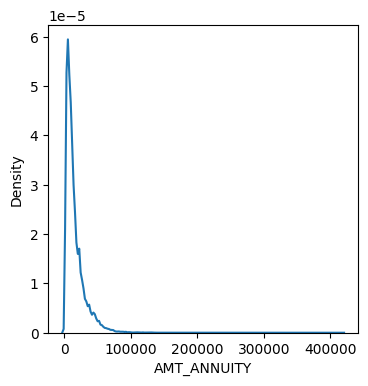

In [74]:
plt.figure(figsize=(4,4))
sns.kdeplot(previous_df['AMT_ANNUITY'])
plt.show()

The single peak at the left side of the distribution indicates presence of outliers, mean would not be the right to fill in the missing values, median will be used instead.

In [75]:
print('AMT_ANNUITY')
print('mean                     :',previous_df['AMT_ANNUITY'].mean())
print('median                   :',previous_df['AMT_ANNUITY'].median())
print('mode                     :',previous_df['AMT_ANNUITY'].mode()[0])
print('min                      :',previous_df['AMT_ANNUITY'].min())
print('max                      :',previous_df['AMT_ANNUITY'].max())

AMT_ANNUITY
mean                     : 15955.120659452119
median                   : 11250.0
mode                     : 2250.0
min                      : 0.0
max                      : 418058.145


In [76]:
previous_df['AMT_ANNUITY'].fillna(previous_df['AMT_ANNUITY'].median(), inplace=True)

In [77]:
print('AMT_ANNUITY')
print('mean                     :',previous_df['AMT_ANNUITY'].mean())
print('median                   :',previous_df['AMT_ANNUITY'].median())
print('mode                     :',previous_df['AMT_ANNUITY'].mode()[0])
print('min                      :',previous_df['AMT_ANNUITY'].min())
print('max                      :',previous_df['AMT_ANNUITY'].max())

AMT_ANNUITY
mean                     : 14906.506177313206
median                   : 11250.0
mode                     : 11250.0
min                      : 0.0
max                      : 418058.145


Fill null values in AMT_GOODS_PRICE with median as the distribution is greatly skewed:

In [78]:
print('AMT_GOODS_PRICE')
print('mean                     :',previous_df['AMT_GOODS_PRICE'].mean())
print('median                   :',previous_df['AMT_GOODS_PRICE'].median())
print('mode                     :',previous_df['AMT_GOODS_PRICE'].mode()[0])
print('min                      :',previous_df['AMT_GOODS_PRICE'].min())
print('max                      :',previous_df['AMT_GOODS_PRICE'].max())

AMT_GOODS_PRICE
mean                     : 227847.27928334562
median                   : 112320.0
mode                     : 45000.0
min                      : 0.0
max                      : 6905160.0


<Axes: xlabel='AMT_GOODS_PRICE', ylabel='Density'>

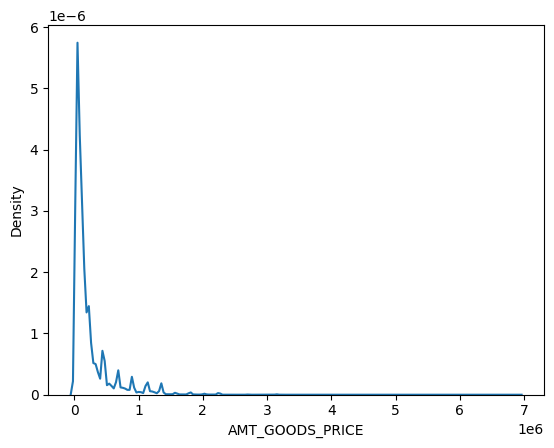

In [79]:
sns.kdeplot(previous_df['AMT_GOODS_PRICE'])

Here there are several peaks along the distribution. Let's impute using the mode, mean and median and see which closely has the same distribution as the same original data.

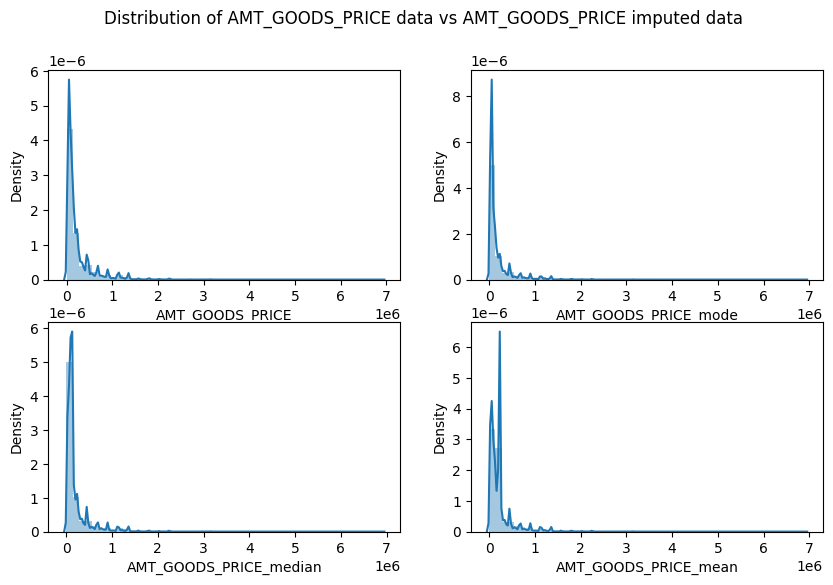

In [80]:
new_df = pd.DataFrame() # new dataframe with columns imputed with mode, median and mean
new_df['AMT_GOODS_PRICE_mode'] = previous_df['AMT_GOODS_PRICE'].fillna(previous_df['AMT_GOODS_PRICE'].mode()[0])
new_df['AMT_GOODS_PRICE_median'] = previous_df['AMT_GOODS_PRICE'].fillna(previous_df['AMT_GOODS_PRICE'].median())
new_df['AMT_GOODS_PRICE_mean'] = previous_df['AMT_GOODS_PRICE'].fillna(previous_df['AMT_GOODS_PRICE'].mean())

new_df_col = ['AMT_GOODS_PRICE_mode', 'AMT_GOODS_PRICE_median','AMT_GOODS_PRICE_mean']

plt.figure(figsize=(10,6))
plt.suptitle('Distribution of AMT_GOODS_PRICE data vs AMT_GOODS_PRICE imputed data')
plt.subplot(221)
sns.distplot(previous_df['AMT_GOODS_PRICE'][pd.notnull(previous_df['AMT_GOODS_PRICE'])]);
for i in enumerate(new_df_col): 
    plt.subplot(2,2,i[0]+2)
    sns.distplot(new_df[i[1]])

The original distribution is closer with the distribution of data imputed with mode in this case, hence we used the mode.

In [81]:
previous_df['AMT_GOODS_PRICE'].fillna(previous_df['AMT_GOODS_PRICE'].mode()[0], inplace=True)

In [82]:
previous_df.loc[previous_df['CNT_PAYMENT'].isnull(),'NAME_CONTRACT_STATUS'].value_counts()

Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
Name: NAME_CONTRACT_STATUS, dtype: int64

In [83]:
previous_df[['CNT_PAYMENT','NAME_CONTRACT_STATUS']].head(10)

CNT_PAYMENT NAME_CONTRACT_STATUS
0         12.0             Approved
1         36.0             Approved
2         12.0             Approved
3         12.0             Approved
4         24.0              Refused
5         18.0             Approved
6          NaN             Canceled
7          NaN             Canceled
8          NaN             Canceled
9          NaN             Canceled

Fill missing values in CNT_PAYMENT with 0 as the NAME_CONTRACT_STATUS for these indicate that most of these loans were not started:

In [84]:
previous_df.loc[previous_df['CNT_PAYMENT'].isnull(),'NAME_CONTRACT_STATUS'].value_counts()

Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
Name: NAME_CONTRACT_STATUS, dtype: int64

In [85]:
previous_df['CNT_PAYMENT'].fillna(0,inplace=True)

In [86]:
round(previous_df.isnull().sum()/previous_df.shape[0]*100,2)

SK_ID_PREV                0.00
SK_ID_CURR                0.00
NAME_CONTRACT_TYPE        0.00
AMT_ANNUITY               0.00
AMT_APPLICATION           0.00
AMT_CREDIT                0.00
AMT_GOODS_PRICE           0.00
NAME_CASH_LOAN_PURPOSE    0.00
NAME_CONTRACT_STATUS      0.00
DAYS_DECISION             0.00
NAME_PAYMENT_TYPE         0.00
CODE_REJECT_REASON        0.00
NAME_CLIENT_TYPE          0.00
NAME_GOODS_CATEGORY       0.00
NAME_PORTFOLIO            0.00
NAME_PRODUCT_TYPE         0.00
CHANNEL_TYPE              0.00
SELLERPLACE_AREA          0.00
NAME_SELLER_INDUSTRY      0.00
CNT_PAYMENT               0.00
NAME_YIELD_GROUP          0.00
PRODUCT_COMBINATION       0.02
DAYS_DECISION_GROUP       0.00
dtype: float64

Null values in the PRODUCT_COMBINATION column can ignore as this percentage is very low.

<a id = "2h"></a><br>

## Outlier Detection the Datasets


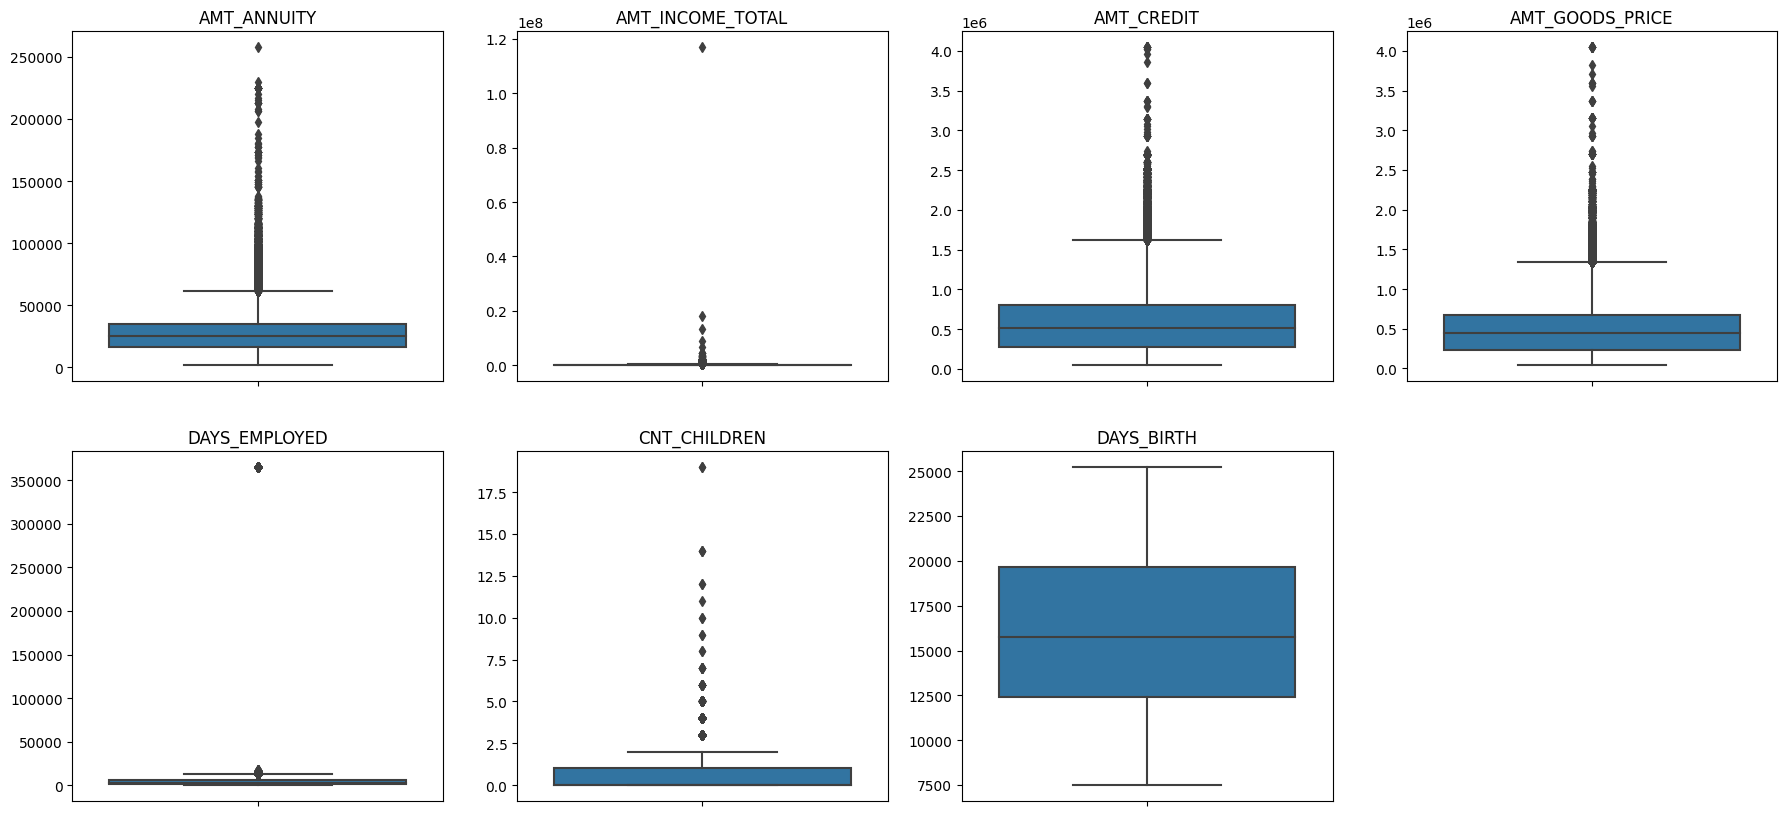

In [87]:
plt.figure(figsize=(22,10))

app_outlier_col_1 = ['AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_EMPLOYED']
app_outlier_col_2 = ['CNT_CHILDREN','DAYS_BIRTH']
for i in enumerate(app_outlier_col_1):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=application_df[i[1]])
    plt.title(i[1])
    plt.ylabel("")

for i in enumerate(app_outlier_col_2):
    plt.subplot(2,4,i[0]+6)
    sns.boxplot(y=application_df[i[1]])
    plt.title(i[1])
    plt.ylabel("")

#### Insight:

It can be seen that in current application_df

AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE,CNT_CHILDREN have outliers.

AMT_INCOME_TOTAL has huge number of outliers which indicate that few of the loan applicants have high income when compared to the others.

DAYS_BIRTH has no outliers which means the data available is reliable.

DAYS_EMPLOYED has outlier values around 350000(days) which is around 958 years which is impossible and hence this has to be incorrect entry.


#### We can see the stats for these columns below as well.

In [88]:
application_df[['AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_BIRTH','CNT_CHILDREN','DAYS_EMPLOYED']].describe()

AMT_ANNUITY  AMT_INCOME_TOTAL    AMT_CREDIT  AMT_GOODS_PRICE  \
count  307499.000000      3.075110e+05  3.075110e+05     3.072330e+05   
mean    27108.573909      1.687979e+05  5.990260e+05     5.383962e+05   
std     14493.737315      2.371231e+05  4.024908e+05     3.694465e+05   
min      1615.500000      2.565000e+04  4.500000e+04     4.050000e+04   
25%     16524.000000      1.125000e+05  2.700000e+05     2.385000e+05   
50%     24903.000000      1.471500e+05  5.135310e+05     4.500000e+05   
75%     34596.000000      2.025000e+05  8.086500e+05     6.795000e+05   
max    258025.500000      1.170000e+08  4.050000e+06     4.050000e+06   

          DAYS_BIRTH   CNT_CHILDREN  DAYS_EMPLOYED  
count  307511.000000  307511.000000  307511.000000  
mean    16036.995067       0.417052   67724.742149  
std      4363.988632       0.722121  139443.751806  
min      7489.000000       0.000000       0.000000  
25%     12413.000000       0.000000     933.000000  
50%     15750.000000       0.000000    2219.000000  
75%     19682.000000       1.000000    5707.000000  
max     25229.000000      19.000000  365243.000000

#### Finding outlier information in previous_df

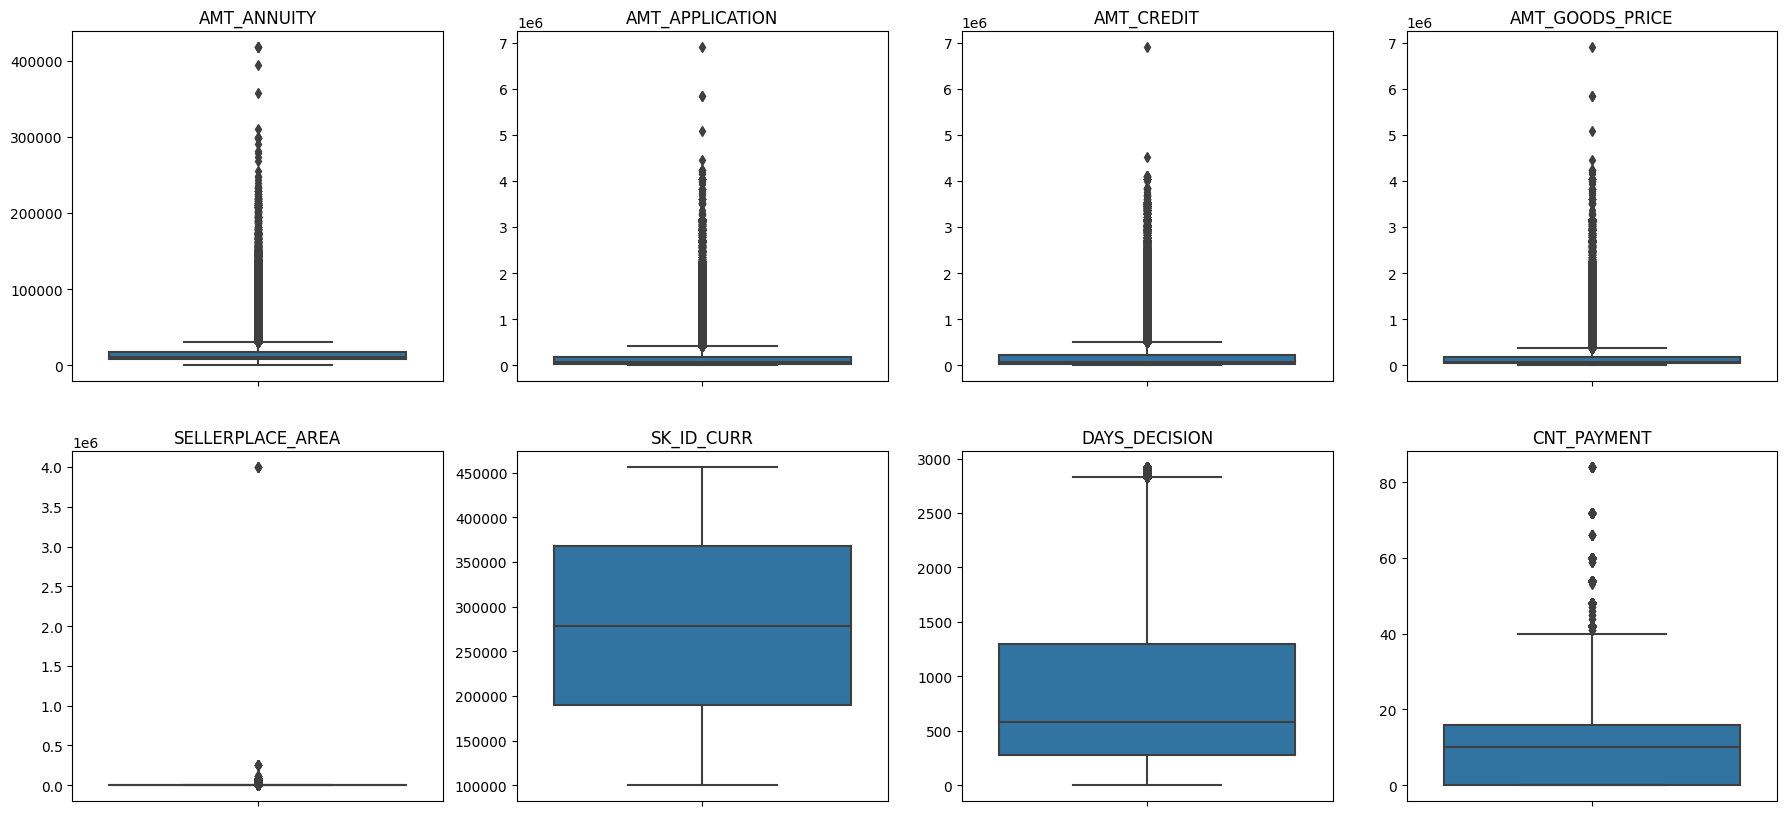

In [89]:
plt.figure(figsize=(22,10))

prev_outlier_col_1 = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','SELLERPLACE_AREA']
prev_outlier_col_2 = ['SK_ID_CURR','DAYS_DECISION','CNT_PAYMENT']
for i in enumerate(prev_outlier_col_1):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=previous_df[i[1]])
    plt.title(i[1])
    plt.ylabel("")

for i in enumerate(prev_outlier_col_2):
    plt.subplot(2,4,i[0]+6)
    sns.boxplot(y=previous_df[i[1]])
    plt.title(i[1])
    plt.ylabel("")

#### Insight: 

It can be seen that in previous application data

AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE, SELLERPLACE_AREA have huge number of outliers.

CNT_PAYMENT has few outlier values.

SK_ID_CURR is an ID column and hence no outliers.

DAYS_DECISION has little number of outliers indicating that these previous applications decisions were taken long back.


#### We can see the stats for these columns below as well.

In [90]:
previous_df[['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'SELLERPLACE_AREA','CNT_PAYMENT','DAYS_DECISION']].describe()

AMT_ANNUITY  AMT_APPLICATION    AMT_CREDIT  AMT_GOODS_PRICE  \
count  1.670214e+06     1.670214e+06  1.670213e+06     1.670214e+06   
mean   1.490651e+04     1.752339e+05  1.961140e+05     1.856429e+05   
std    1.317751e+04     2.927798e+05  3.185746e+05     2.871413e+05   
min    0.000000e+00     0.000000e+00  0.000000e+00     0.000000e+00   
25%    7.547096e+03     1.872000e+04  2.416050e+04     4.500000e+04   
50%    1.125000e+04     7.104600e+04  8.054100e+04     7.105050e+04   
75%    1.682403e+04     1.803600e+05  2.164185e+05     1.804050e+05   
max    4.180581e+05     6.905160e+06  6.905160e+06     6.905160e+06   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_DECISION  
count      1.670214e+06  1.670214e+06   1.670214e+06  
mean       3.139511e+02  1.247621e+01   8.806797e+02  
std        7.127443e+03  1.447588e+01   7.790997e+02  
min       -1.000000e+00  0.000000e+00   1.000000e+00  
25%       -1.000000e+00  0.000000e+00   2.800000e+02  
50%        3.000000e+00  1.000000e+01   5.810000e+02  
75%        8.200000e+01  1.600000e+01   1.300000e+03  
max        4.000000e+06  8.400000e+01   2.922000e+03

<a id = "3"></a><br>

# Exploratory Data Analysis



### Analysing Repayer  vs Defaulter Counts

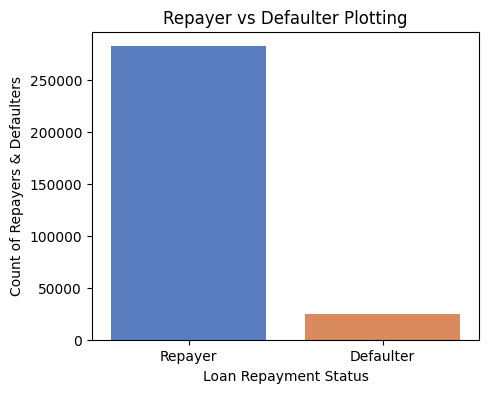

In [91]:
Rep_Def_Count = application_df["TARGET"].value_counts().reset_index()

plt.figure(figsize=(5,4))
sns.barplot(x=['Repayer','Defaulter'],y='TARGET',data=Rep_Def_Count,palette='muted')
plt.xlabel("Loan Repayment Status")
plt.ylabel("Count of Repayers & Defaulters")
plt.title("Repayer vs Defaulter Plotting")
plt.show()

In [92]:
count_0 = Rep_Def_Count.iloc[0]["TARGET"]
count_1 = Rep_Def_Count.iloc[1]["TARGET"]
count_0_perc = round(count_0/(count_0+count_1)*100,2)
count_1_perc = round(count_1/(count_0+count_1)*100,2)

print('Ratios of imbalance in percentage with respect to Repayer and Defaulter datas are: %.2f and %.2f'%(count_0_perc,count_1_perc))
print('Ratios of imbalance in relative with respect to Repayer and Defaulter datas is %.2f : 1 (approx)'%(count_0/count_1))

Ratios of imbalance in percentage with respect to Repayer and Defaulter datas are: 91.93 and 8.07
Ratios of imbalance in relative with respect to Repayer and Defaulter datas is 11.39 : 1 (approx)


<a id = "3a"></a><br>
### Creating Plotting Function for Univariate, Bivariate, Multivariate for Categorical Variables Analysis


Plotting functions customized to perform uniform anaysis that is called for all plots:

In [93]:
cat_pa = application_df[['NAME_CONTRACT_TYPE', 'TARGET']].groupby(['NAME_CONTRACT_TYPE'],as_index=False).mean()

cat_pa["TARGET"] = cat_pa["TARGET"]*100
cat_pa

NAME_CONTRACT_TYPE    TARGET
0         Cash loans  8.345913
1    Revolving loans  5.478329

In [94]:
catpa = application_df.groupby('NAME_CONTRACT_TYPE', as_index=False)[['TARGET']].mean()
catpa['TARGET']=catpa['TARGET']*100
catpa

NAME_CONTRACT_TYPE    TARGET
0         Cash loans  8.345913
1    Revolving loans  5.478329

In [95]:
catpa.sort_values(by='TARGET', ascending=False, inplace=True)
catpa

NAME_CONTRACT_TYPE    TARGET
0         Cash loans  8.345913
1    Revolving loans  5.478329

In [96]:
# function for plotting repetitive countplots in univariate categorical analysis on applicationDF
# This function will create two subplots: 
# 1. Count plot of categorical column w.r.t TARGET; 
# 2. Percentage of defaulters within column

def univariate_categorical(feature,ylog=False,label_rotation=False,horizontal_layout=True):
    temp = application_df[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = application_df[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc["TARGET"] = cat_perc["TARGET"]*100
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20,24))
        
    # 1. Subplot 1: Count plot of categorical column
    # sns.set_palette("Set2")
    s = sns.countplot(ax=ax1, 
                    x = feature, 
                    data=application_df,
                    hue ="TARGET",
                    order=cat_perc[feature],
                    palette='muted')
    
    # Define common styling
    ax1.set_title(feature, fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'}) 
    ax1.legend(['Repayer','Defaulter'])
    
    # If the plot is not readable, use the log scale.
    if ylog:
        ax1.set_yscale('log')
        ax1.set_ylabel("Count (log)",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})   
    
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    # 2. Subplot 2: Percentage of defaulters within the categorical column
    s = sns.barplot(ax=ax2, 
                    x = feature, 
                    y='TARGET', 
                    order=cat_perc[feature], 
                    data=cat_perc,
                    palette='BuPu')
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of Defaulters [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)
    ax2.set_title(feature + " Defaulter %", fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 

    plt.show();

In [97]:
# function for plotting repetitive countplots in bivariate categorical analysis

def bivariate_bar(x,y,df,hue,figsize):
    
    plt.figure(figsize=figsize)
    sns.barplot(x=x,
                  y=y,
                  data=df, 
                  hue=hue, 
                  palette='muted')     
        
    # Defining aesthetics of Labels and Title of the plot using style dictionaries
    plt.xlabel(x,fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})    
    plt.ylabel(y,fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})    
    plt.title(col, fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    plt.xticks(rotation=90, ha='right')
    plt.legend(labels = ['Repayer','Defaulter'])
    plt.show()

In [98]:
# function for plotting repetitive rel plots in bivaritae numerical analysis on applicationDF

def bivariate_rel(x,y,data, hue, kind, palette, legend,figsize):
    
    plt.figure(figsize=figsize)
    sns.relplot(x=x, 
                y=y, 
                data=application_df, 
                hue="TARGET",
                kind=kind,
                palette = 'muted',
                legend = False)
    plt.legend(['Repayer','Defaulter'])
    plt.xticks(rotation=90, ha='right')
    plt.show()

In [99]:
#function for plotting repetitive countplots in univariate categorical analysis on the merged df

def univariate_merged(col,df,hue,palette,ylog,figsize):
    plt.figure(figsize=figsize)
    ax=sns.countplot(x=col, 
                  data=df,
                  hue= hue,
                  palette= palette,
                  order=df[col].value_counts().index)
    

    if ylog:
        plt.yscale('log')
        plt.ylabel("Count (log)",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})     
    else:
        plt.ylabel("Count",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})       

    plt.title(col , fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    plt.legend(loc = "upper right")
    plt.xticks(rotation=90, ha='right')
    
    plt.show()

In [100]:
# Function to plot point plots on merged dataframe

def merged_pointplot(x,y):
    plt.figure(figsize=(8,4))
    sns.pointplot(x=x, 
                  y=y, 
                  hue="TARGET", 
                  data=loan_process_df,
                  palette ='muted')
   # plt.legend(['Repayer','Defaulter'])

<a id = "3b"></a><br>
### Categorical Variables Analysis 



#### Segmented Univariate Analysis 

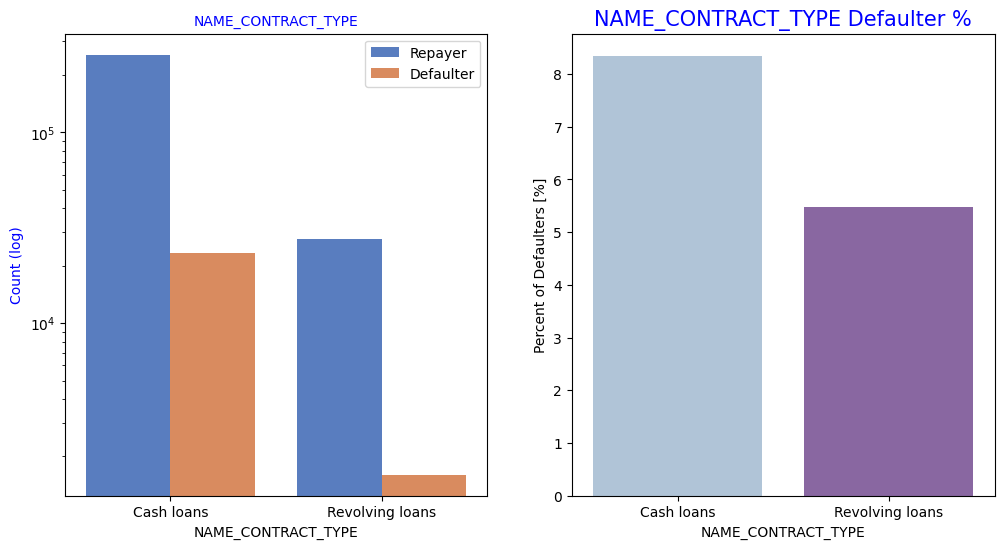

In [101]:
# Checking the contract type based on loan repayment status
univariate_categorical('NAME_CONTRACT_TYPE',True)

<b>NAME_CONTRACT_TYPE:</b> 

Majority of the customers have taken cash loans than revolving loans are greater in number than revolving loans , at the same time, customers who have taken revolving loans are more likely to default.

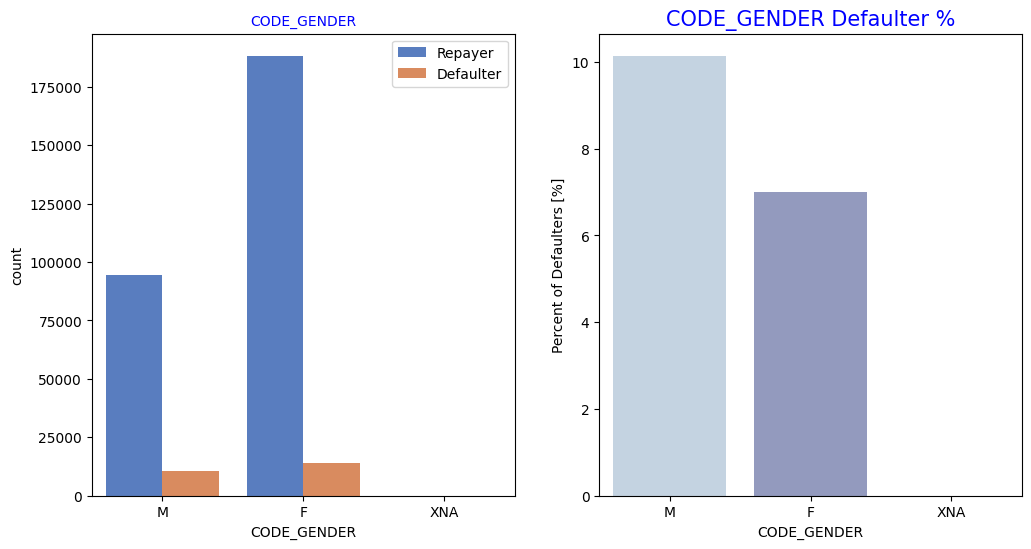

In [102]:
# Checking the type of Gender on loan repayment status
univariate_categorical('CODE_GENDER')

<b>CODE_GENDER</b>

The number of female clients is almost twice the number of male clients. Based on the percentage of defaulted credits, males are  more likely to default (10%), comparing with women (7%).

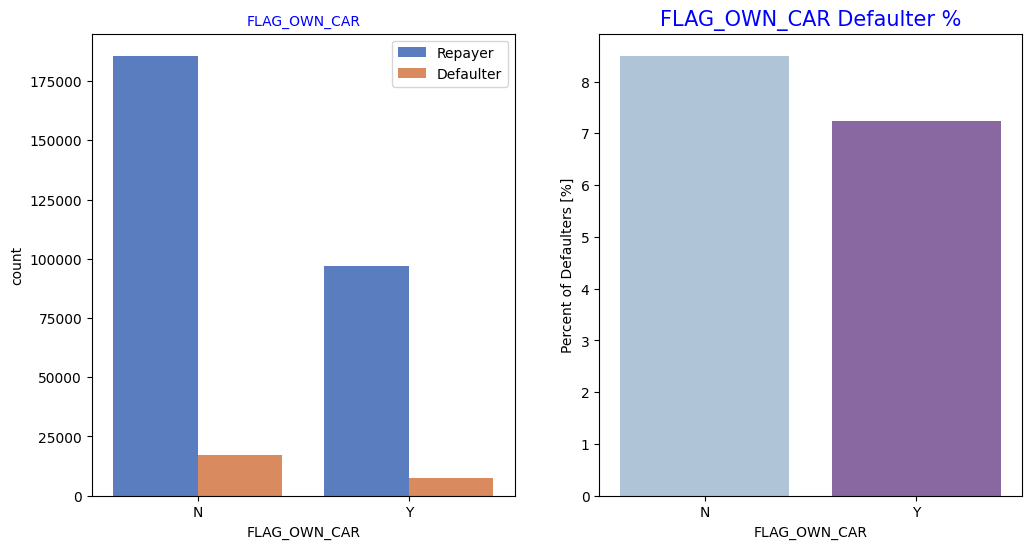

In [103]:
# Checking if owning a car is related to loan repayment status
univariate_categorical('FLAG_OWN_CAR')

<b>FLAG_OWN_CAR</b>

Clients who have no car is twice the number clients who own a car. Percentage of default shows having/not having a car has no correlation to loan repayment because in both cases the default percentage is almost same.

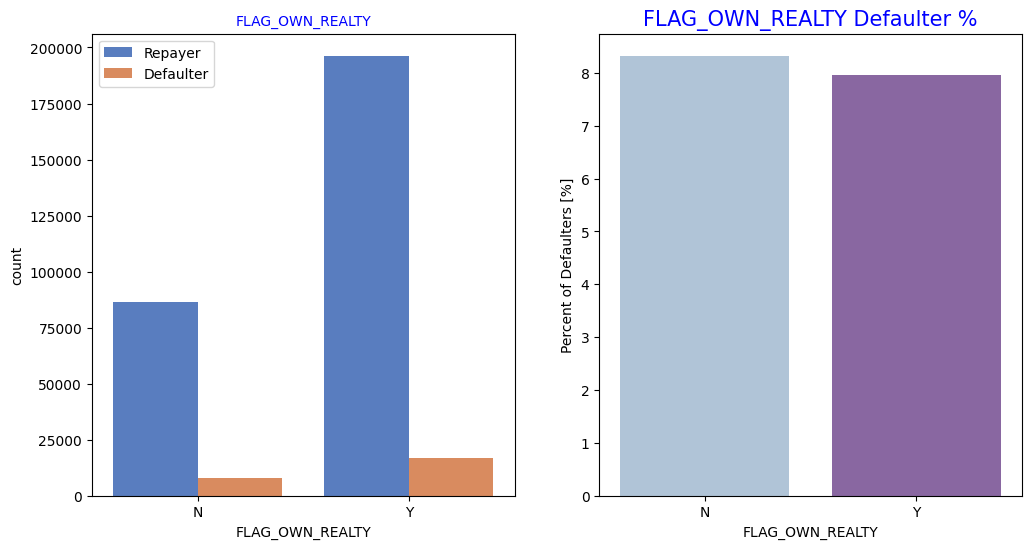

In [104]:
# Checking if owning a realty is related to loan repayment status
univariate_categorical('FLAG_OWN_REALTY')

<b>FLAG_OWN_REALTY</b>

Clients who own real estate is more than twice the number clients who do not real estates. Percentage of default shows owning/not owning a real esate has no correlation to loan repayment because in both cases the default percentage is the same.

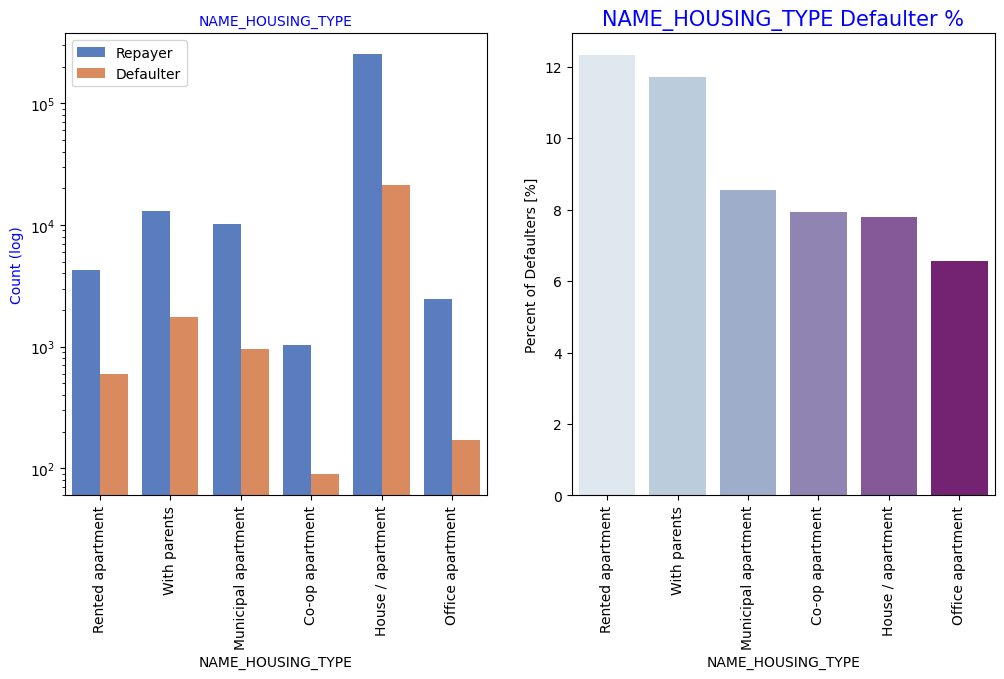

In [105]:
# Analyzing Housing Type based on loan repayment status
univariate_categorical("NAME_HOUSING_TYPE",True,True,True)

<b>NAME_HOUSING_TYPE</b>
    
1. Majority of the clients live in House/apartment NAME_HOUSING_TYPE

2. Percentage of default shows that those living in Rented apartment(>12%) and With parents(>11%) have higher probalility to default

3. People living in office apartments have lowest default rate

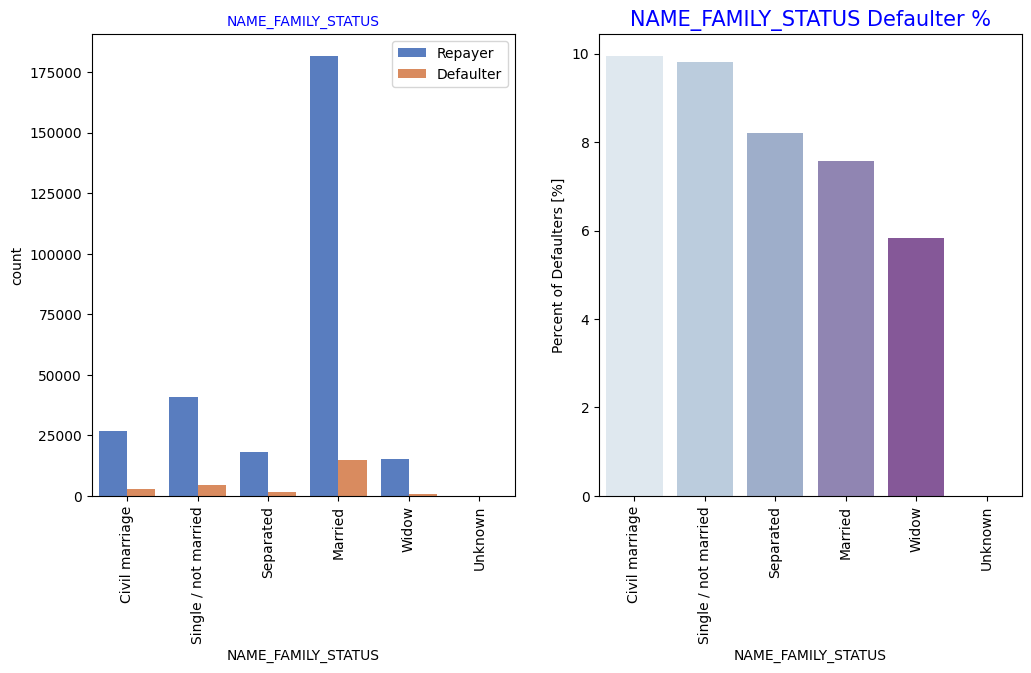

In [106]:
# Analyzing Family status based on loan repayment status
univariate_categorical("NAME_FAMILY_STATUS",False,True,True)

<b>NAME_EDUCATION_TYPE</b>

Majority of the loan are taken by married people, followed by Single/not married and then civil marriage

Default percentage shows that Civil marriage has the highest percent of not repayment (10%), with Widow the lowest (exception being Unknown).

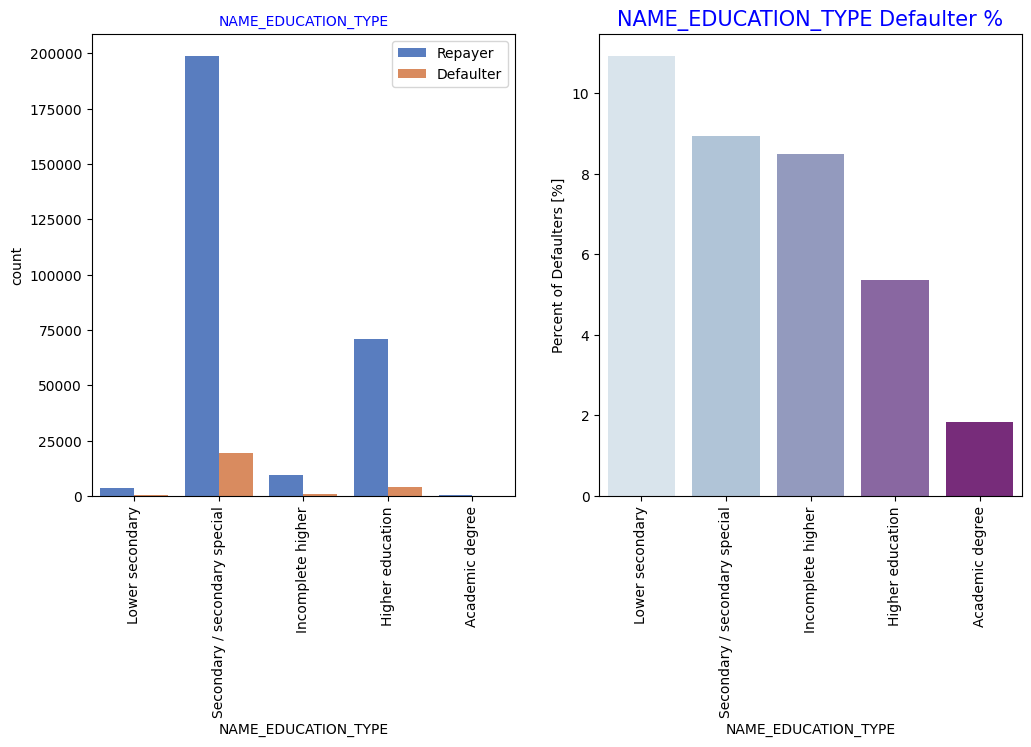

In [107]:
# Analyzing Education Type based on loan repayment status
univariate_categorical("NAME_EDUCATION_TYPE",False,True,True)

<b>NAME_EDUCATION_TYPE</b>

Majority of the clients have Secondary / secondary special education, followed by clients with Higher education. Very small number have an academic degree

The Lower secondary category, although few, have the highest default rate (11%). Academic degree have less than 2% defaulting rate.

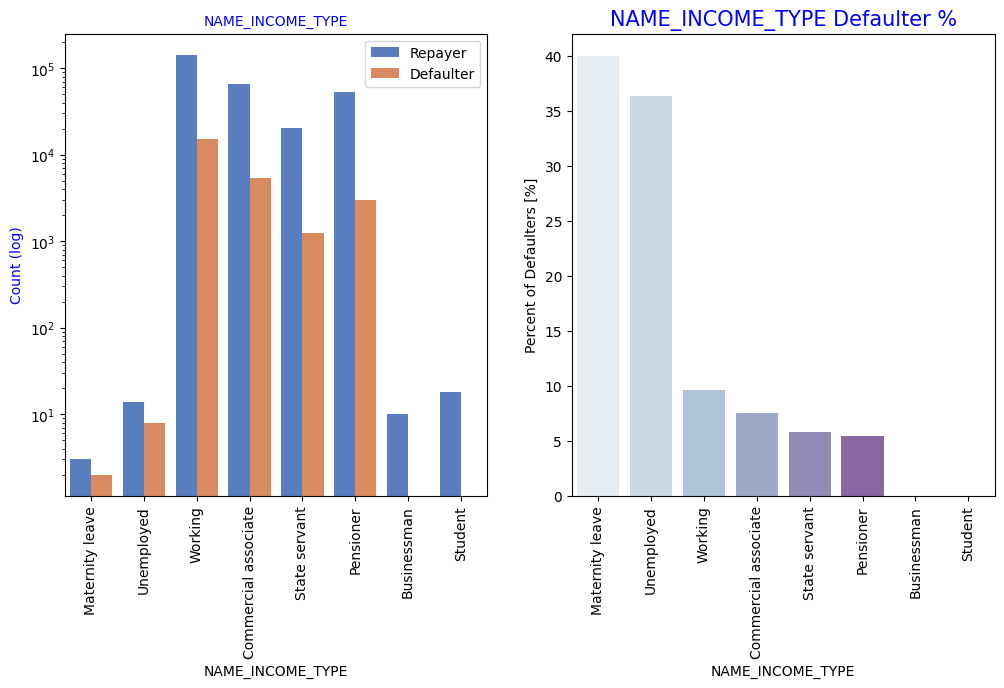

In [108]:
# Analyzing Income Type based on loan repayment status
univariate_categorical("NAME_INCOME_TYPE",True,True,True)

<b>NAME_INCOME_TYPE</b>

Most of the loan applicants have income type as Working, followed by Commercial associate, Pensioner and then State servant.

in terms of defaulft, applicants with the income type Maternity have almost 40% chance defaulting, followed by Unemployed (37%). Other income type category are under 10% aret of defaulting.

Student and Businessmen, though very few in number do not have any default rate. Thus these two category are safest for providing loan.

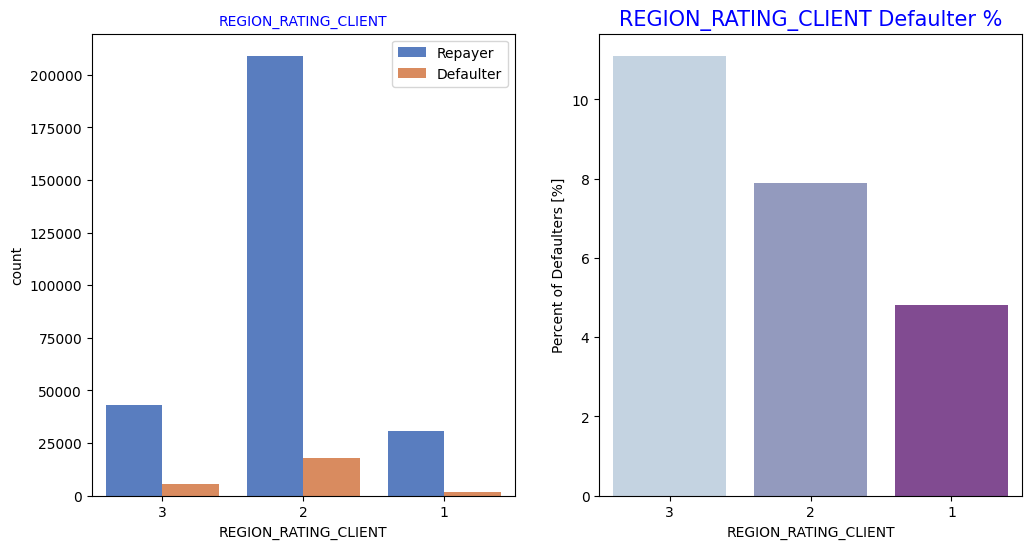

In [109]:
# Analyzing Region rating where applicant lives based on loan repayment status
univariate_categorical("REGION_RATING_CLIENT",False,False,True)

<b>REGION_RATING_CLIENT/b>
    
1. Majority of the loan applicants live in Region_Rating 2.

2. Region Rating 3 has the highest default rate (11%)

3. Applicants living in Region_Rating 1 has the lowest probability of defaulting, thus safer for approving loans

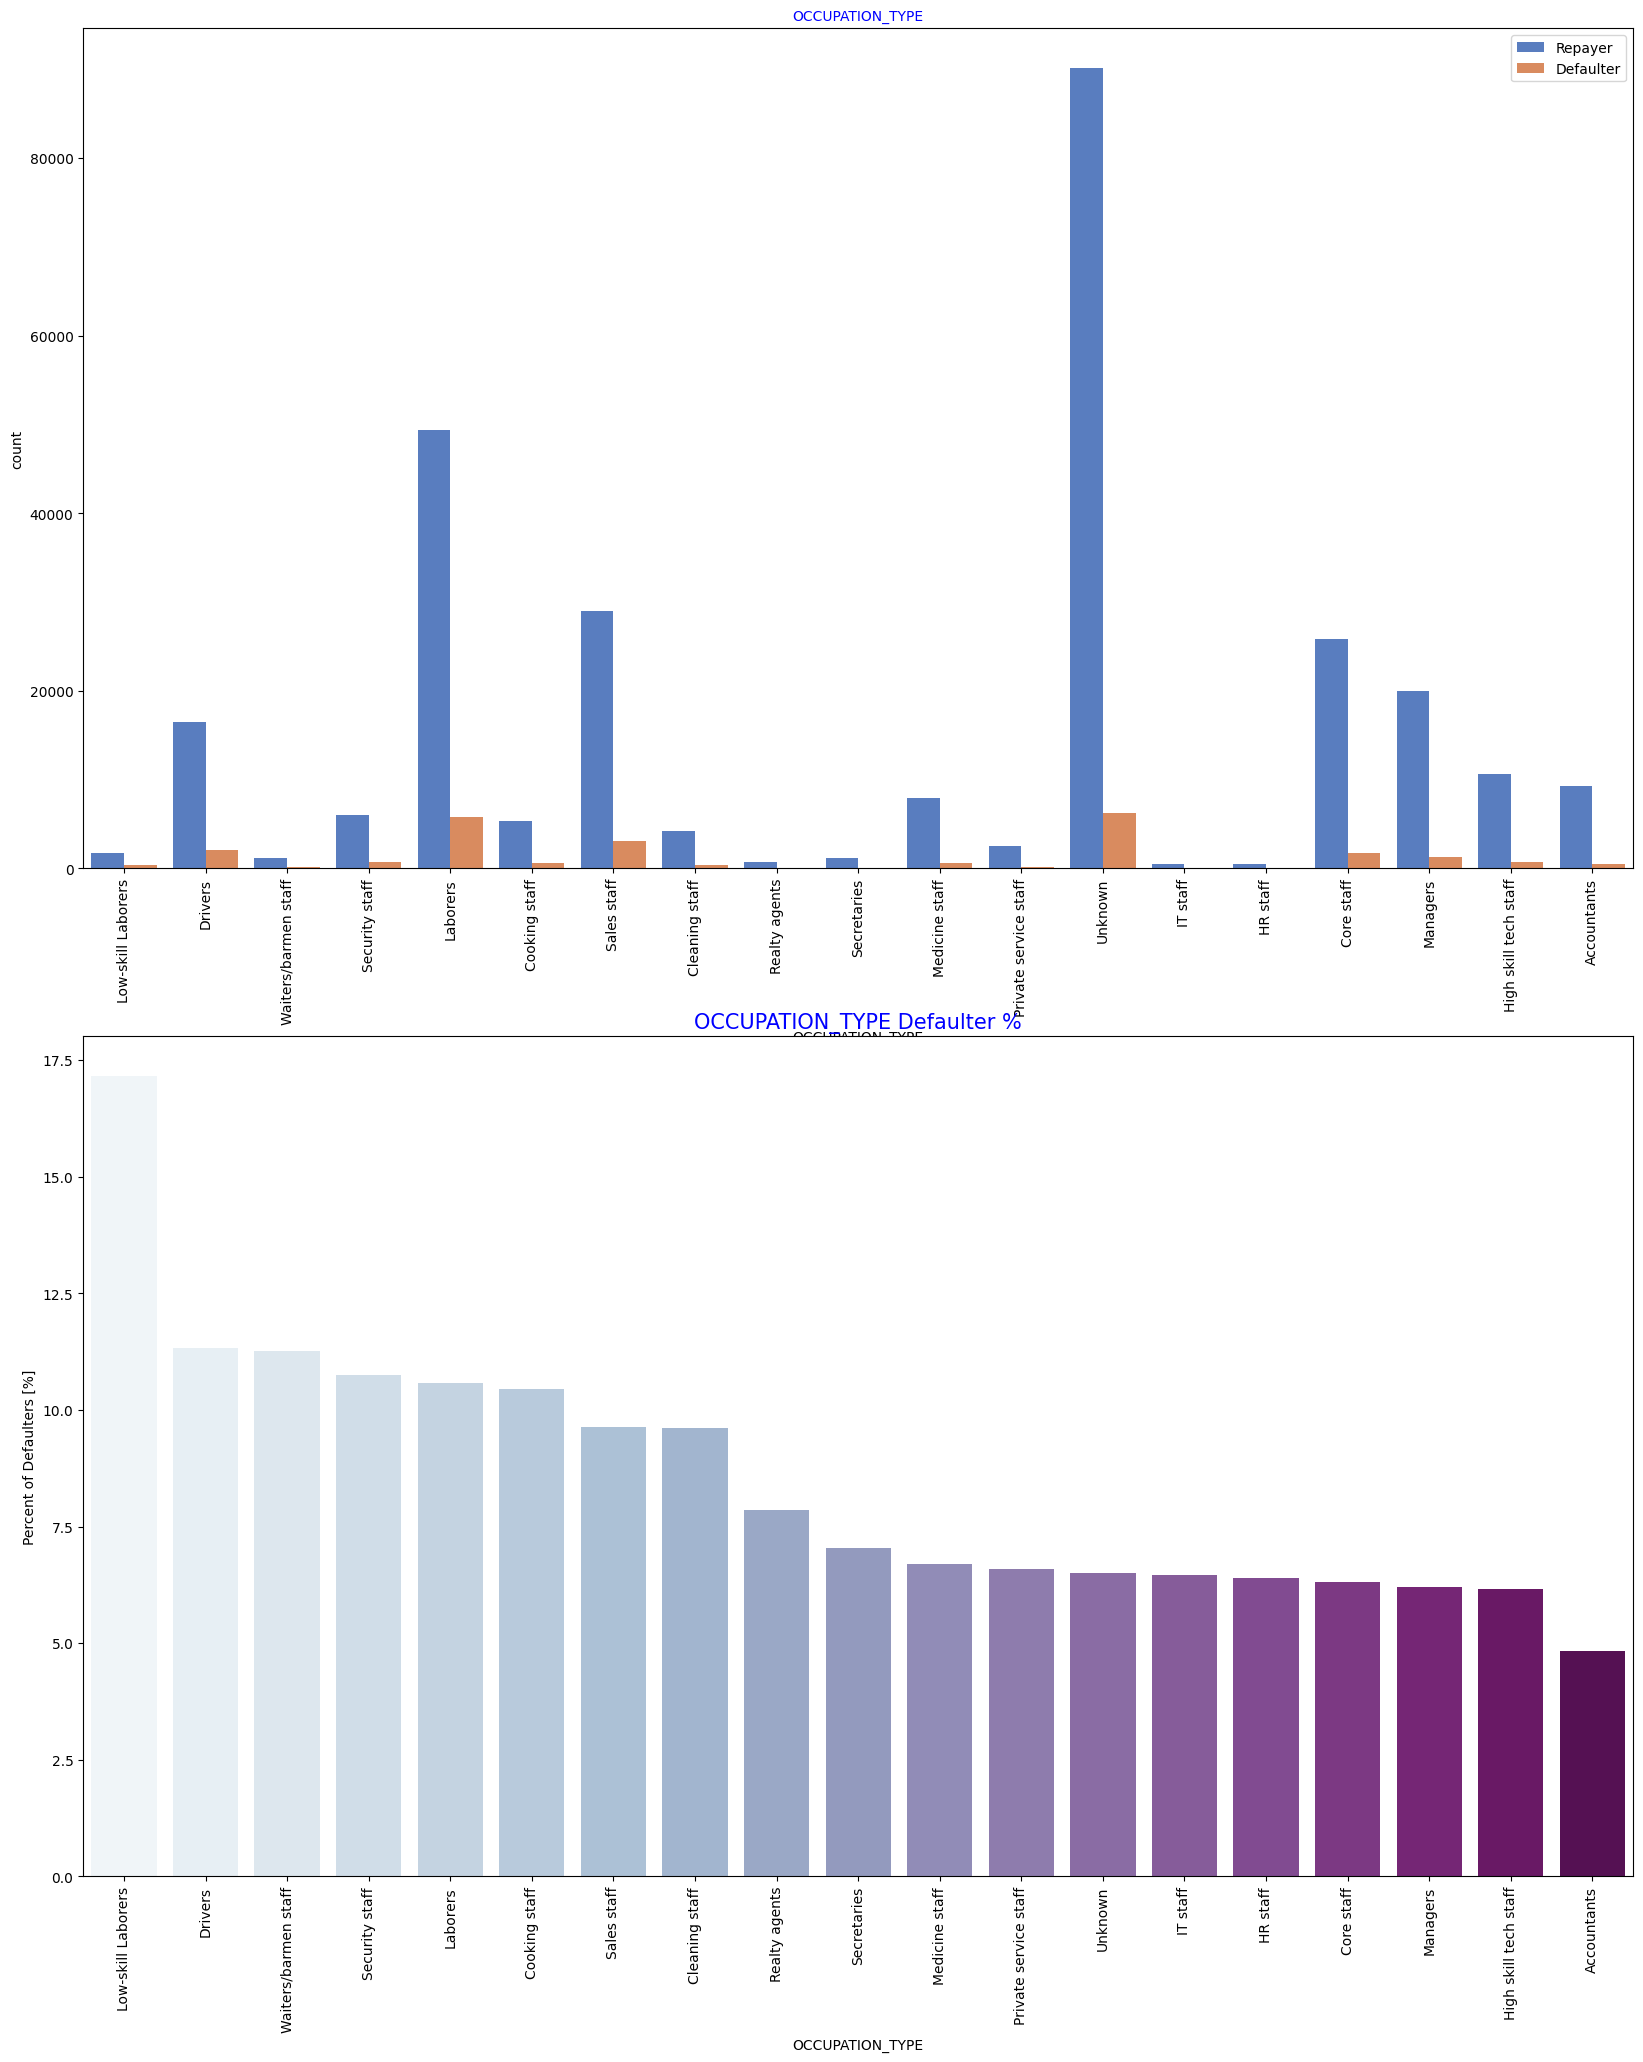

In [110]:
# Analyzing Occupation Type where applicant lives based on loan repayment status
univariate_categorical("OCCUPATION_TYPE",False,True,False)

<b>OCCUPATION_TYPE</b> 
Most of the loans are taken by Laborers, followed by Sales staff. IT staff take the lowest amount of loans.

In terms of default Low-skill Laborers have (above 17%) default rate, followed by Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff.

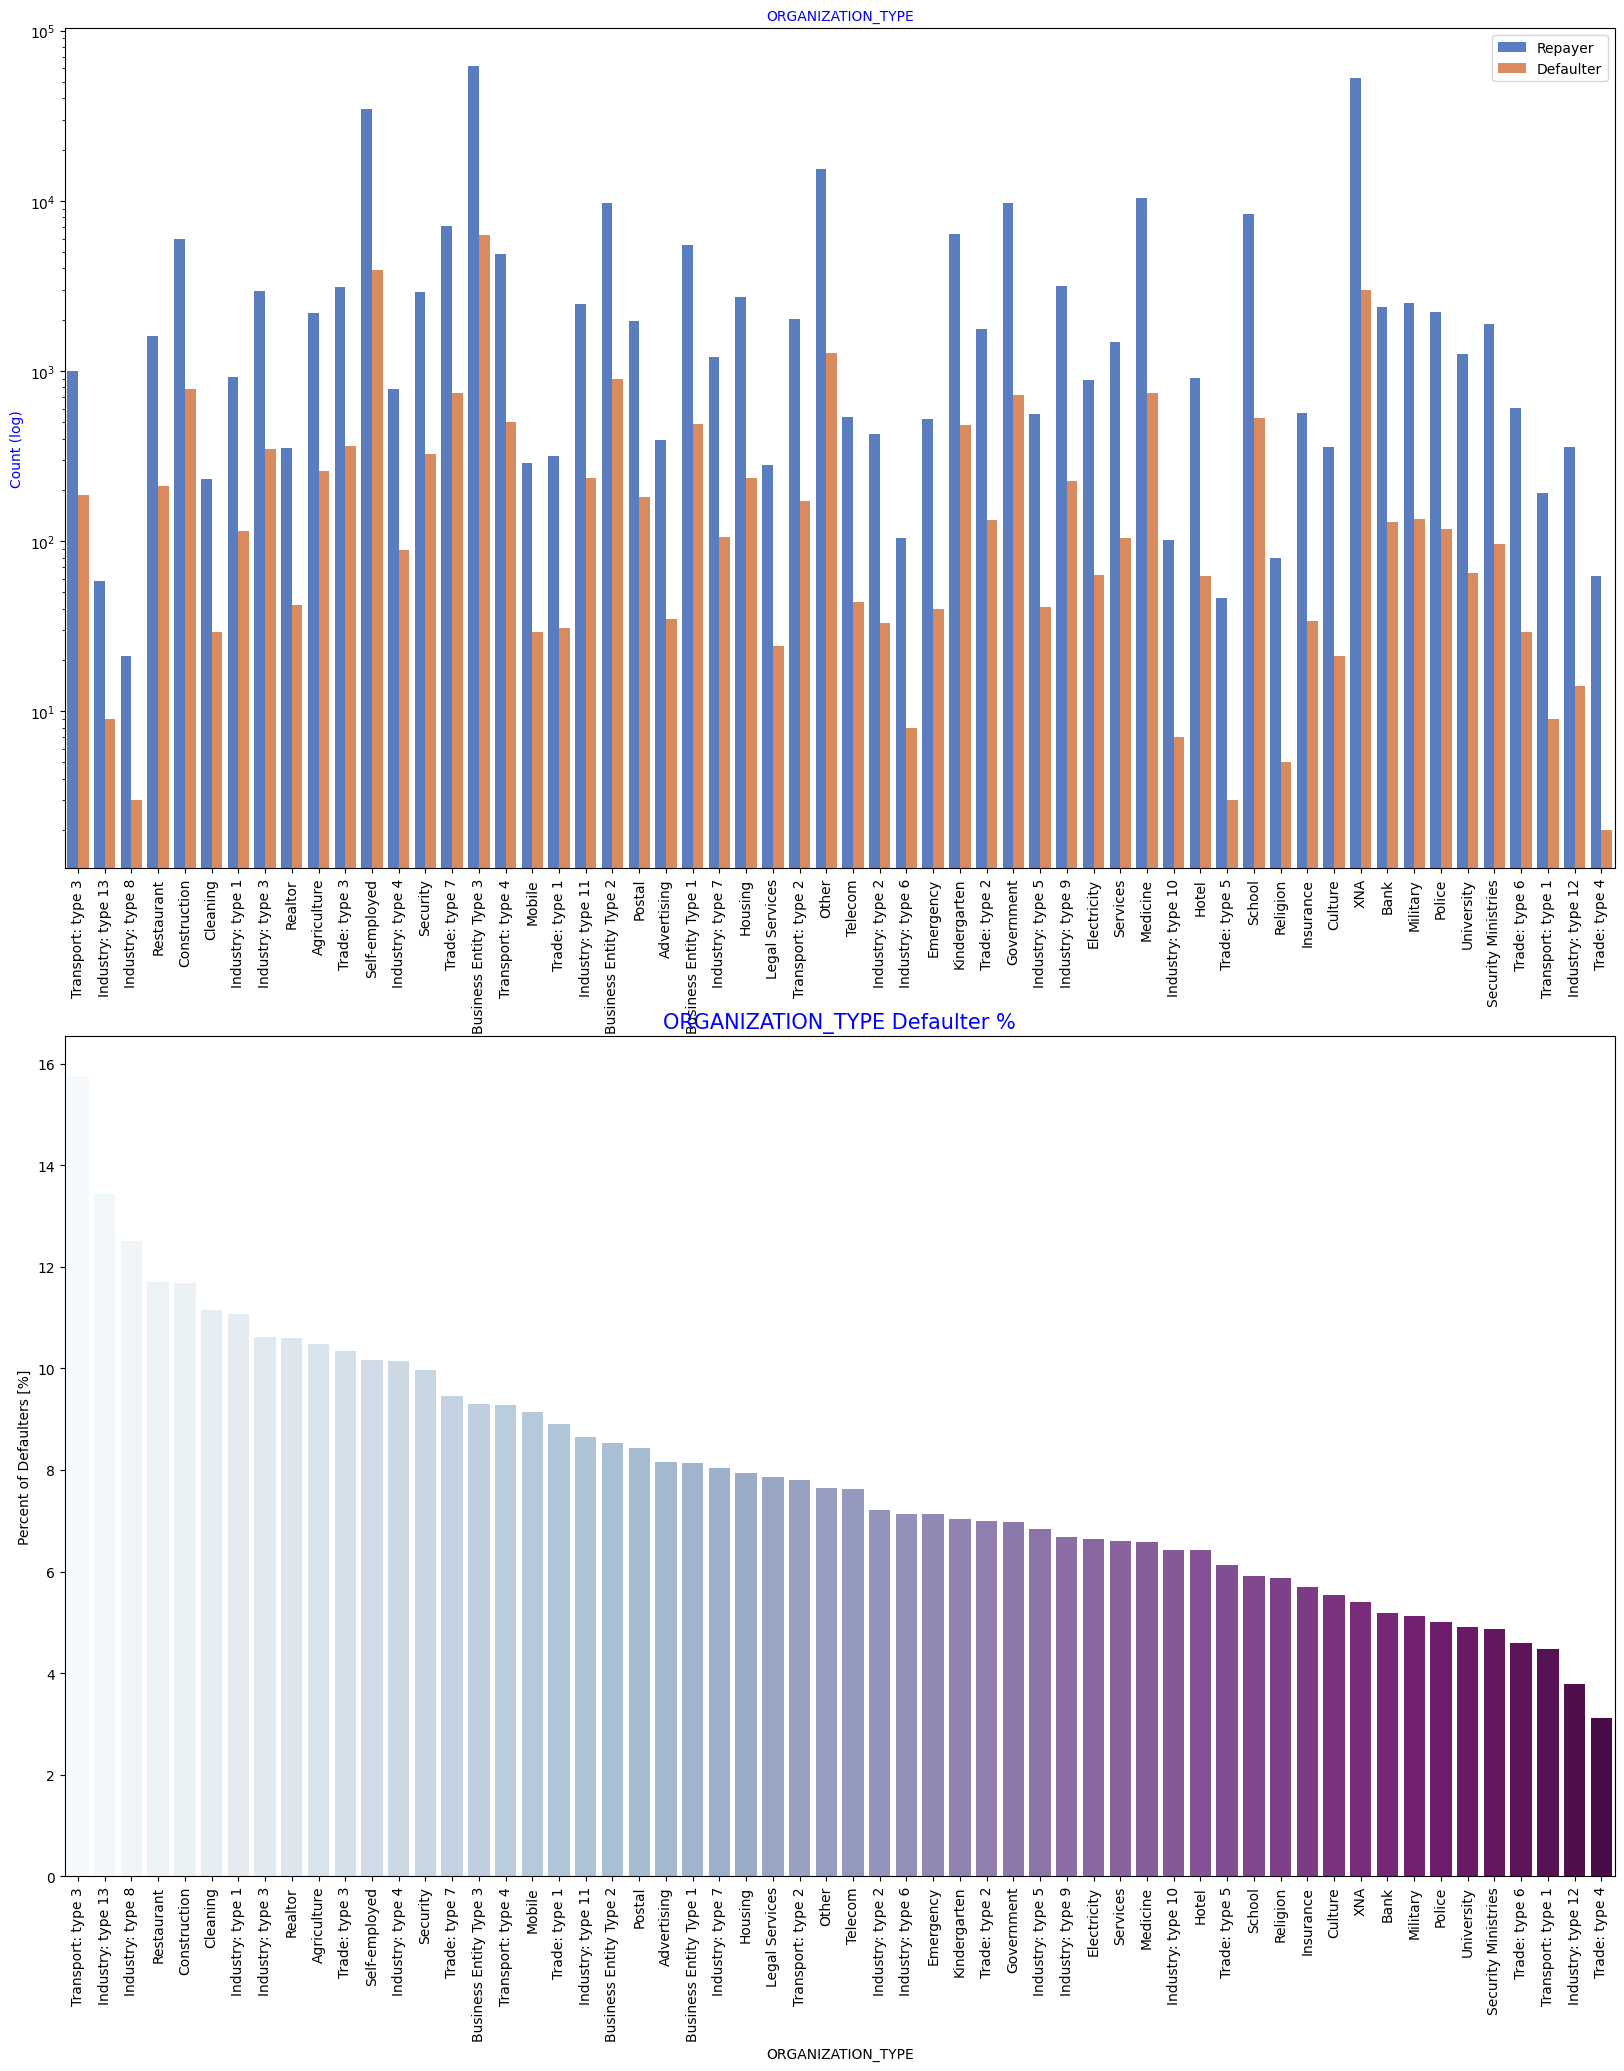

In [111]:
# Checking Loan repayment status based on Organization type
univariate_categorical("ORGANIZATION_TYPE",True,True,False)

<b>ORGANIZATION_TYPE</b>
1. Most of the people application for loan are from Business Entity Type 3

2. For a very high number of applications, Organization type information is unavailable(XNA)

3. Organizations with highest percent of loans not repaid are Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%) and Restaurant (less than 12%). Self employed people have relative high defaulting rate, and thus should be avoided to be approved for loan or provide loan with higher interest rate to mitigate the risk of defaulting.

Loan applicants from the following organization type has lesser defaulte rate and are safer for providing loans:
- Trade Type 4 and 5
- Industry type 8

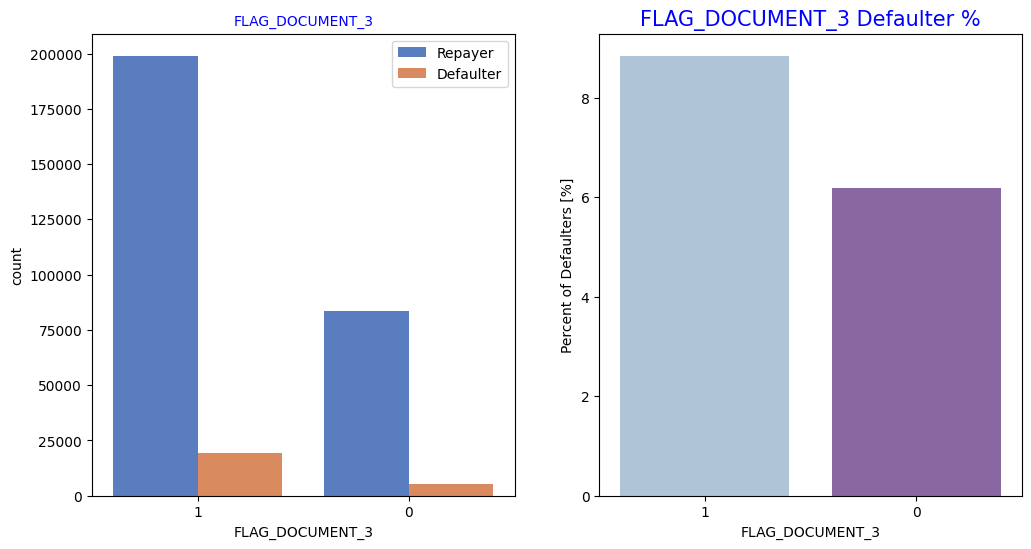

In [112]:
# Analyzing Flag_Doc_3 submission status based on loan repayment status
univariate_categorical("FLAG_DOCUMENT_3",False,False,True)

<b>FLAG_DOCUMENT_3</b>

Submitting FLAG_DOCUMENT_3 has no influence whether appliant repay or default, as can be seen, applicants who have submitted the document, have default rate of almost (9%) more than applicants who did not submit the document (6%)

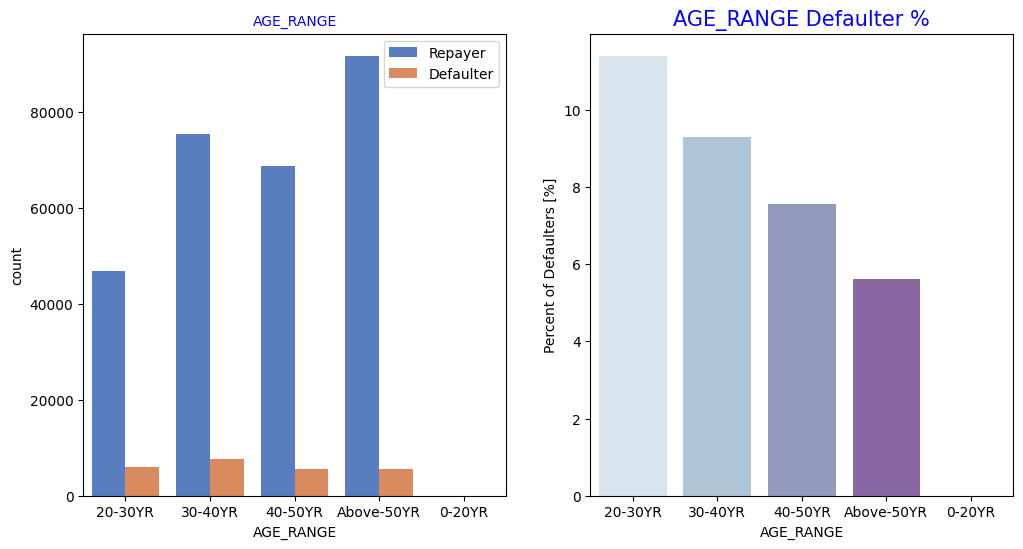

In [113]:
# Analyzing Age Group based on loan repayment status
univariate_categorical("AGE_RANGE",False,False,True)

<b>AGE_RANGE</b>

1. Most of the Loan applicants are clients Above 50YR

2. People in the age group range 20-40 have higher probability of defaulting, above (11%) default rate. 

3. People above age of 50 have low probability of defailting, hence are safer to offer loan.

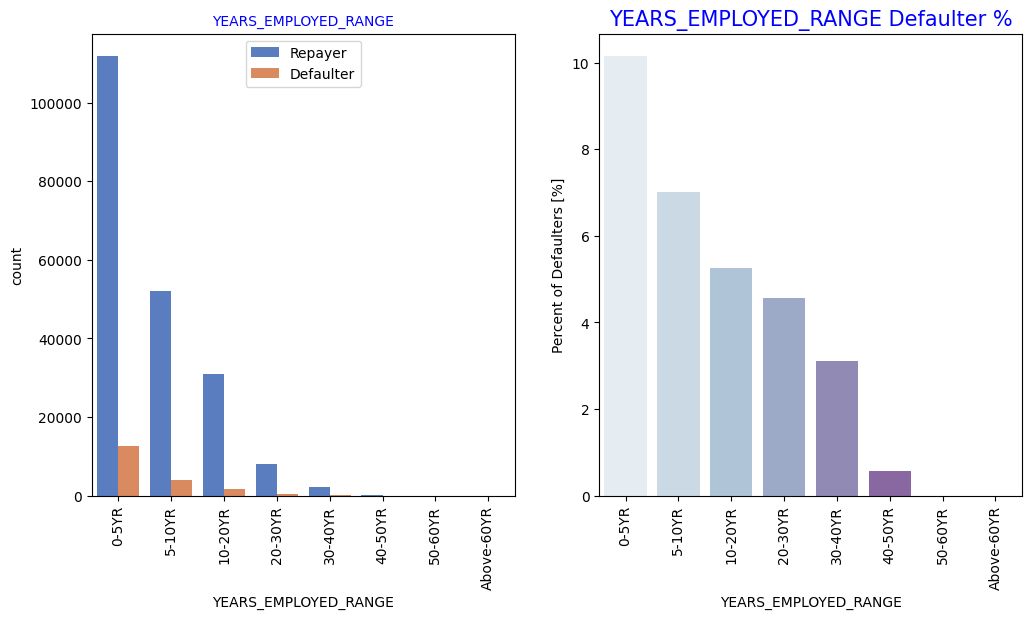

In [114]:
# Analyzing Employment_Year based on loan repayment status
univariate_categorical("YEARS_EMPLOYED_RANGE",False,True,True)

<b>YEARS_EMPLOYED_RANGE</b>

Most of the loan applicants have been employed about 0-5 years. The default rating of this group is also the highest (10%)
            
Default rate is decreasing with increase of employment year. People having 40+ year experience having less than 1% default rate.

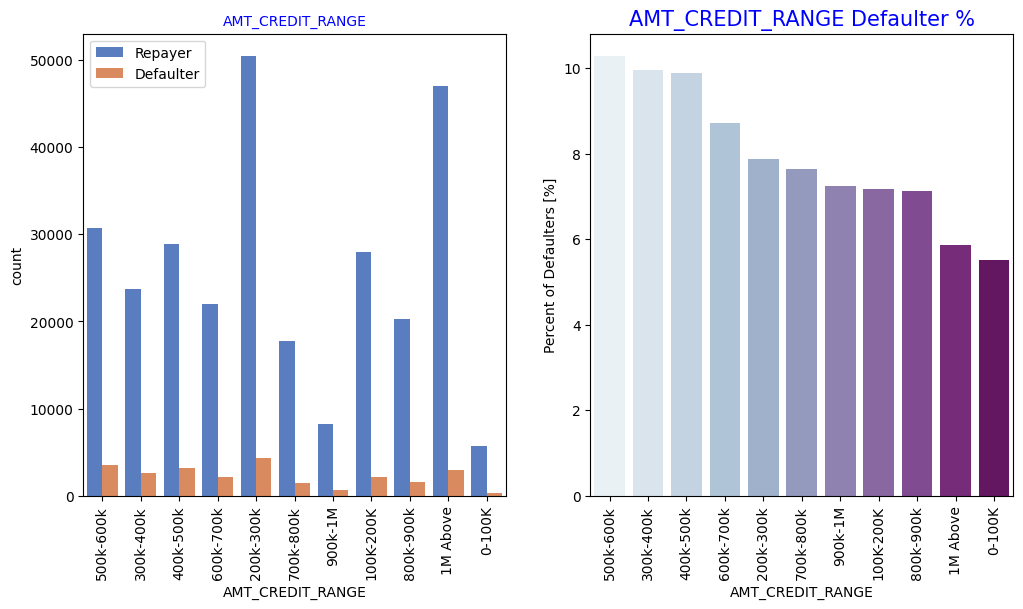

In [115]:
# Analyzing Amount_Credit based on loan repayment status
univariate_categorical("AMT_CREDIT_RANGE",False,True,True)

<b>AMT_CREDIT_RANGE</b>

- More than 80% of the loan provided are for amount less than 900k

- People who get loan amount between 300-600k tend to default more compared to others.

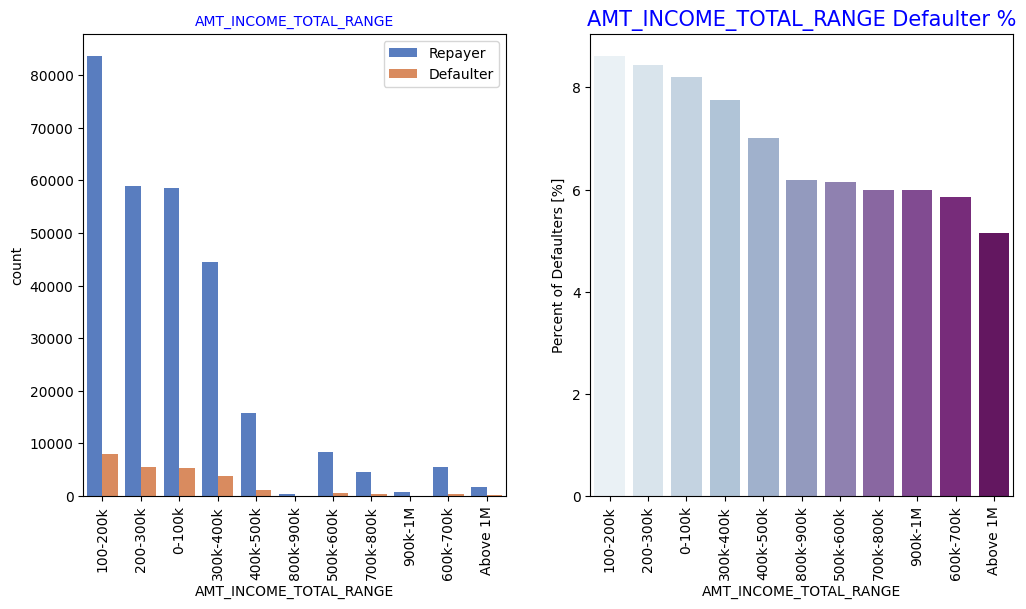

In [116]:
# Analyzing Amount_Income Range based on loan repayment status
univariate_categorical("AMT_INCOME_TOTAL_RANGE",False,True,True)

<b>AMT_INCOME_TOTAL_RANGE</b>

- 90% of the applications have Income total less than 300

- Application with Income less than 300k has high probability of defaulting

- Applicant with Income more than 700k are less likely to default

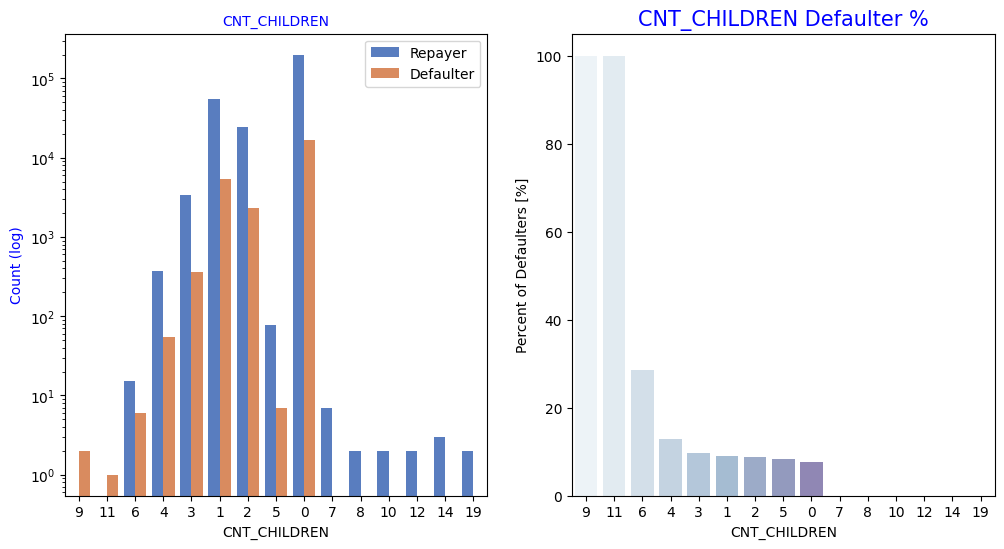

In [117]:
# Analyzing Number of children based on loan repayment status
univariate_categorical("CNT_CHILDREN",True)

<b>CNT_CHILDREN</b>

- Most of the loan applicants do not have children

- Very few clients have more than 3 children.

- Client who have more than 4 children has a very high default rate with child count 9 and 11 showing 100% default rate

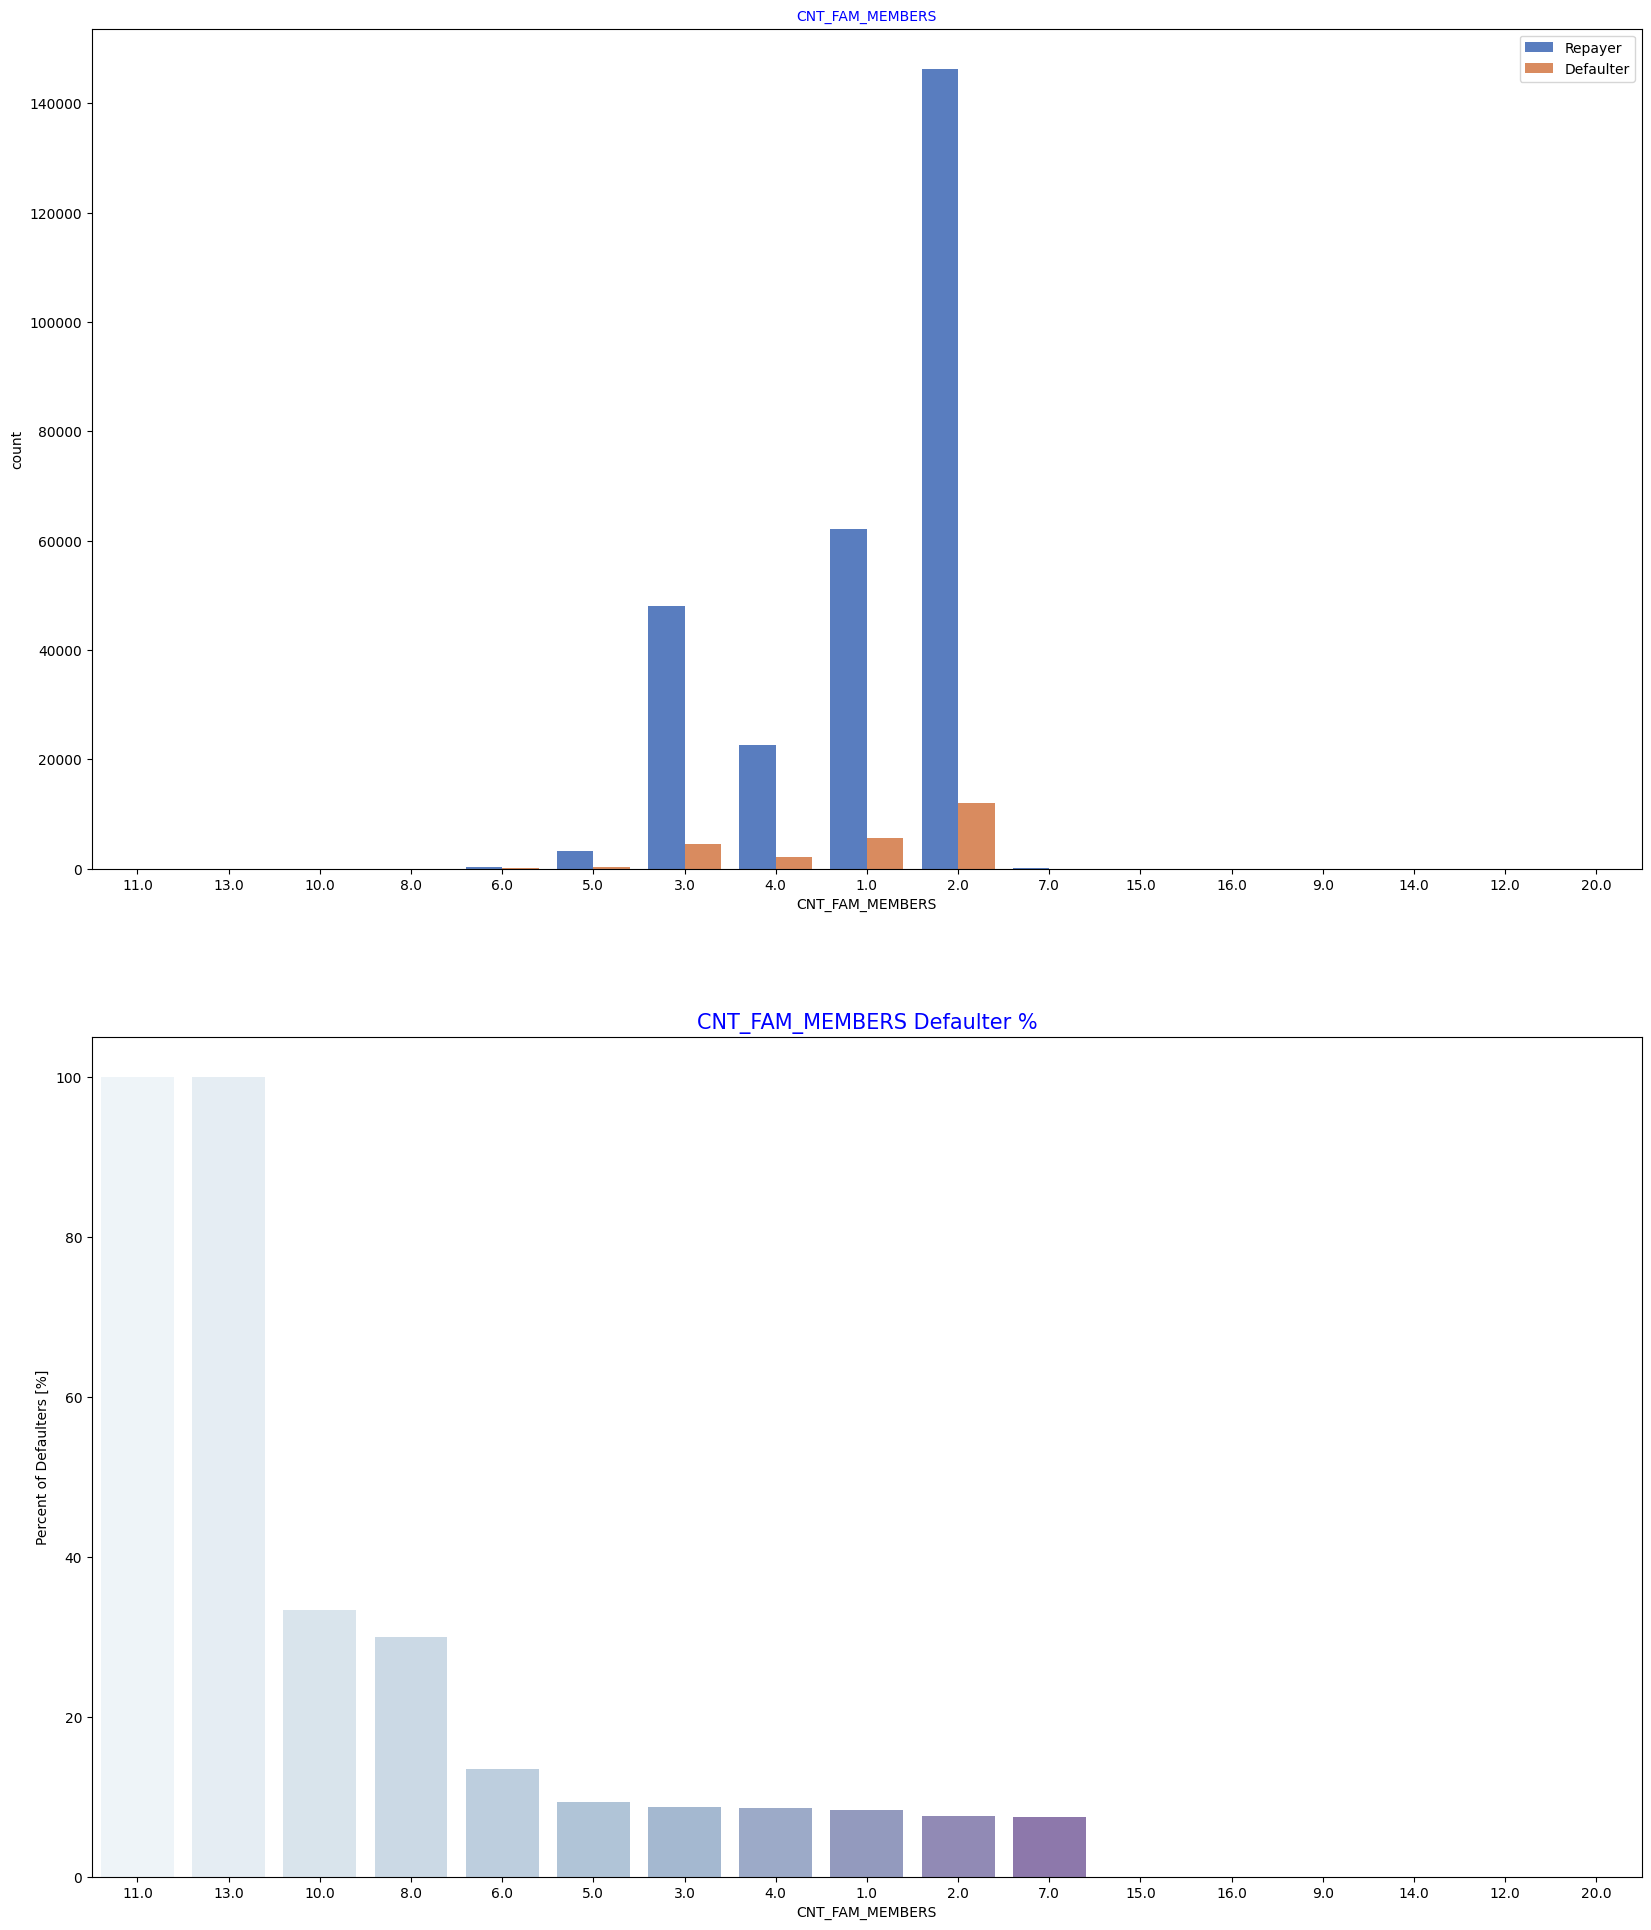

In [118]:
# Analyzing Number of family members based on loan repayment status
univariate_categorical("CNT_FAM_MEMBERS",False, False, False)

<b>CNT_FAM_MEMBERS</b>

- Most of the applicants have 1-5 family members

- Default probability is high where applicants have more family members

### Categorical Bi/Multivariate Analysis

In [120]:
application_df.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].describe()

count           mean            std       min  \
NAME_INCOME_TYPE                                                         
Businessman               10.0  652500.000000  627226.035812  180000.0   
Commercial associate   71617.0  202955.327289  147974.151536   26550.0   
Maternity leave            5.0  140400.000000  126856.907577   49500.0   
Pensioner              55362.0  136401.292273   76650.331247   25650.0   
State servant          21703.0  179737.969506  100880.579748   27000.0   
Student                   18.0  170500.000000  106644.682171   81000.0   
Unemployed                22.0  110536.363636   88055.079059   26550.0   
Working               158774.0  163169.889223  307577.685943   25650.0   

                           25%       50%       75%          max  
NAME_INCOME_TYPE                                                 
Businessman           225000.0  495000.0  843750.0    2250000.0  
Commercial associate  135000.0  180000.0  225000.0   18000090.0  
Maternity leave        67500.0   90000.0  135000.0     360000.0  
Pensioner              90000.0  117000.0  166500.0    2250000.0  
State servant         112500.0  157500.0  225000.0    3150000.0  
Student               112500.0  157500.0  178875.0     562500.0  
Unemployed             54000.0   78750.0  135000.0     337500.0  
Working               112500.0  135000.0  202500.0  117000000.0

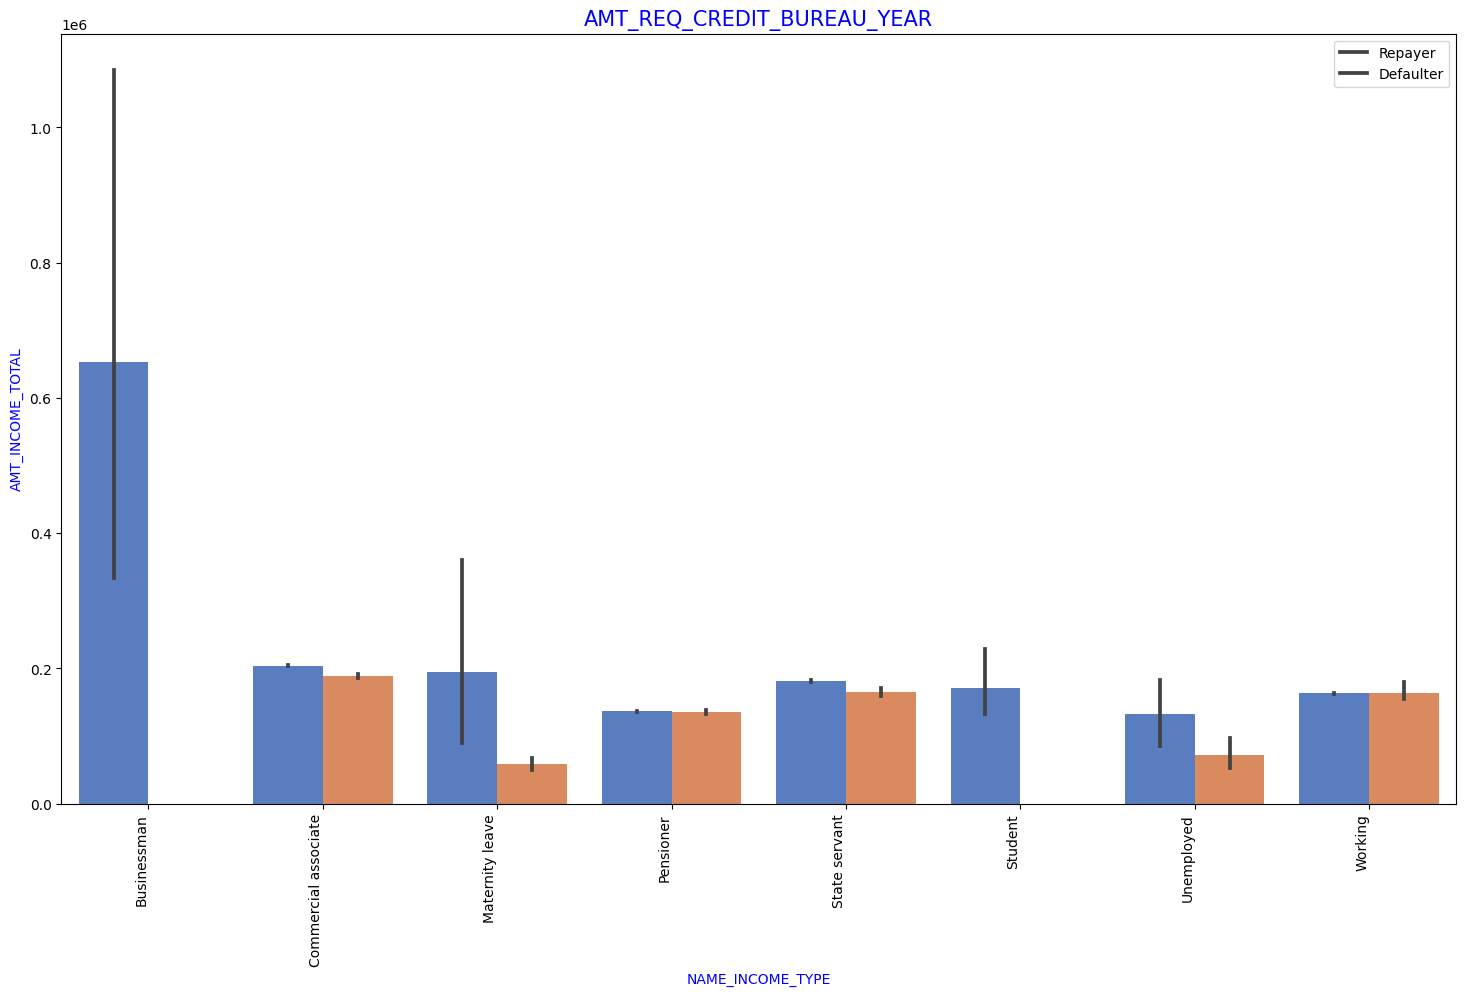

In [121]:
# Income type vs Income Amount Range
bivariate_bar("NAME_INCOME_TYPE","AMT_INCOME_TOTAL",application_df,"TARGET",(18,10))

It can be seen that business man's income is the highest and the estimated range with default 95% confidence level seem to indicate that the income of a business man could be in the range of slightly close to 4 lakhs and slightly above 10 lakhs

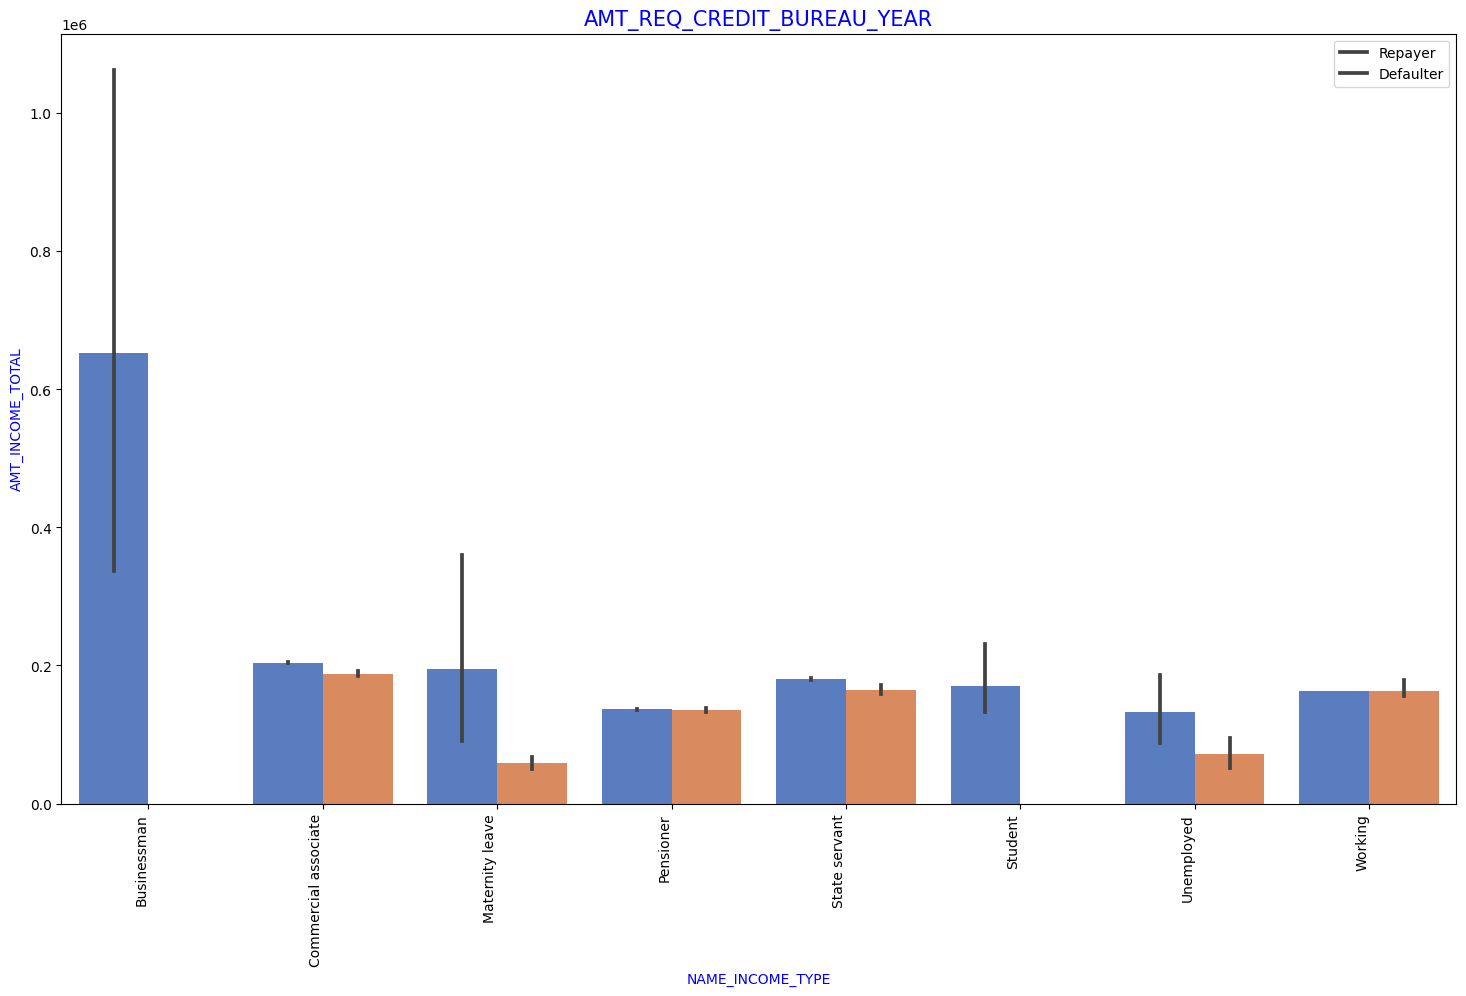

In [122]:
bivariate_bar("NAME_INCOME_TYPE","AMT_INCOME_TOTAL",application_df,"TARGET",(18,10))

<a id = "3c"></a><br>
### Numeric Variables Analysis

#### Bifurcating the applicationDF dataframe based on Target value 0 and 1 for correlation and other analysis

In [123]:
application_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3',
       'AMT

In [151]:
application_df.shape[1]

52

In [152]:
# Bifurcating the application_df dataframe based on Target value 0 and 1 for correlation and other analysis
cols_for_correlation = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
                        'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
                        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                        'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
                        'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
                        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
                        'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3',
                        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


Repayer_df = application_df.loc[application_df['TARGET']==0, cols_for_correlation] # Repayers
Defaulter_df = application_df.loc[application_df['TARGET']==1, cols_for_correlation] # Defaulters

In [154]:
len(cols_for_correlation)

42

In [173]:
# rem =['SK_ID_CURR', 'TARGET', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'AMT_INCOME_TOTAL_RANGE',
# 'AMT_CREDIT_RANGE', 'AGE', 'AGE_RANGE','YEARS_EMPLOYED', 'YEARS_EMPLOYED_RANGE']
# application_df[rem].info()

#### Correlation between numeric variable

In [125]:
# Getting the top 10 correlation for the Repayers data
corr_repayer = Repayer_df.corr()
corr_repayer = corr_repayer.where(np.triu(np.ones(corr_repayer.shape),k=1).astype(np.bool_))
corr_df_repayer = corr_repayer.unstack().reset_index()
corr_df_repayer.columns =['VAR1','VAR2','Correlation']
corr_df_repayer.dropna(subset = ["Correlation"], inplace = True)
corr_df_repayer["Correlation"]=corr_df_repayer["Correlation"].abs()
corr_df_repayer.sort_values(by='Correlation', ascending=False, inplace=True) 
corr_df_repayer.head(10)

VAR1              VAR2  Correlation
94     AMT_GOODS_PRICE        AMT_CREDIT     0.987250
230    CNT_FAM_MEMBERS      CNT_CHILDREN     0.878571
95     AMT_GOODS_PRICE       AMT_ANNUITY     0.776686
71         AMT_ANNUITY        AMT_CREDIT     0.771309
167      DAYS_EMPLOYED        DAYS_BIRTH     0.626114
70         AMT_ANNUITY  AMT_INCOME_TOTAL     0.418953
93     AMT_GOODS_PRICE  AMT_INCOME_TOTAL     0.349462
47          AMT_CREDIT  AMT_INCOME_TOTAL     0.342799
138         DAYS_BIRTH      CNT_CHILDREN     0.336966
190  DAYS_REGISTRATION        DAYS_BIRTH     0.333151

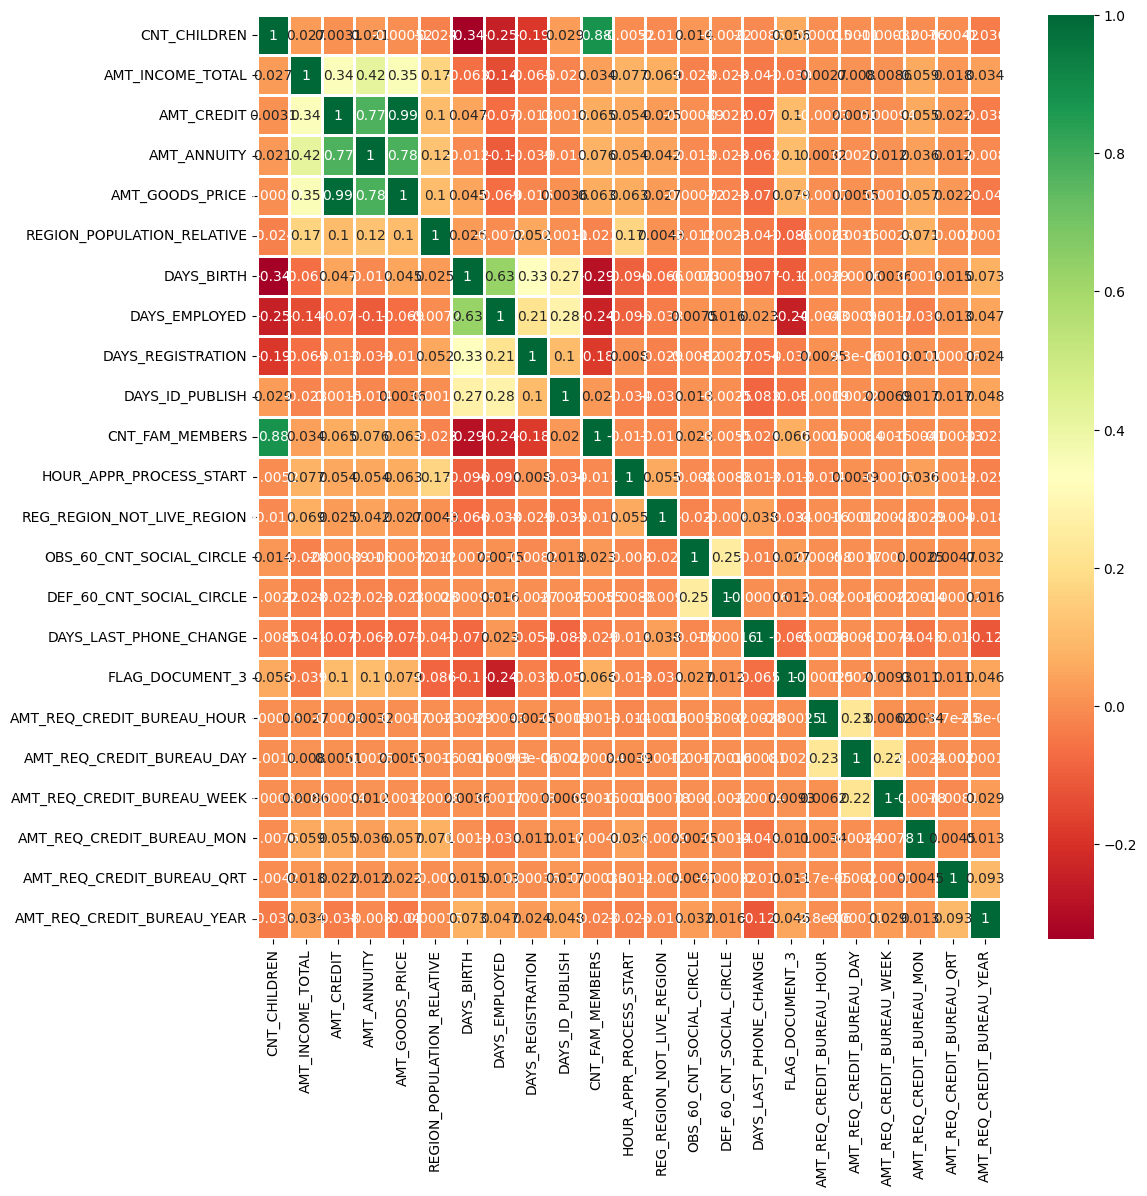

In [126]:
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(Repayer_df.corr(), cmap="RdYlGn",annot=True,linewidth =1)

### Correlating factors amongst repayers:

#### Credit amount is highly correlated with

1. Amount of goods price

2. Loan annuity

3. Total income

4. Number of days employed.

In [127]:
# Getting the top 10 correlation for the Defaulter data
corr_Defaulter = Defaulter_df.corr()
corr_Defaulter = corr_Defaulter.where(np.triu(np.ones(corr_Defaulter.shape),k=1).astype(np.bool_))
corr_df_Defaulter = corr_Defaulter.unstack().reset_index()
corr_df_Defaulter.columns =['VAR1','VAR2','Correlation']
corr_df_Defaulter.dropna(subset = ["Correlation"], inplace = True)
corr_df_Defaulter["Correlation"]=corr_df_Defaulter["Correlation"].abs()
corr_df_Defaulter.sort_values(by='Correlation', ascending=False, inplace=True)
corr_df_Defaulter.head(10)

VAR1                      VAR2  Correlation
94            AMT_GOODS_PRICE                AMT_CREDIT     0.983103
230           CNT_FAM_MEMBERS              CNT_CHILDREN     0.885484
95            AMT_GOODS_PRICE               AMT_ANNUITY     0.752699
71                AMT_ANNUITY                AMT_CREDIT     0.752195
167             DAYS_EMPLOYED                DAYS_BIRTH     0.582185
190         DAYS_REGISTRATION                DAYS_BIRTH     0.289114
375           FLAG_DOCUMENT_3             DAYS_EMPLOYED     0.272169
335  DEF_60_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE     0.264159
138                DAYS_BIRTH              CNT_CHILDREN     0.259109
213           DAYS_ID_PUBLISH                DAYS_BIRTH     0.252863

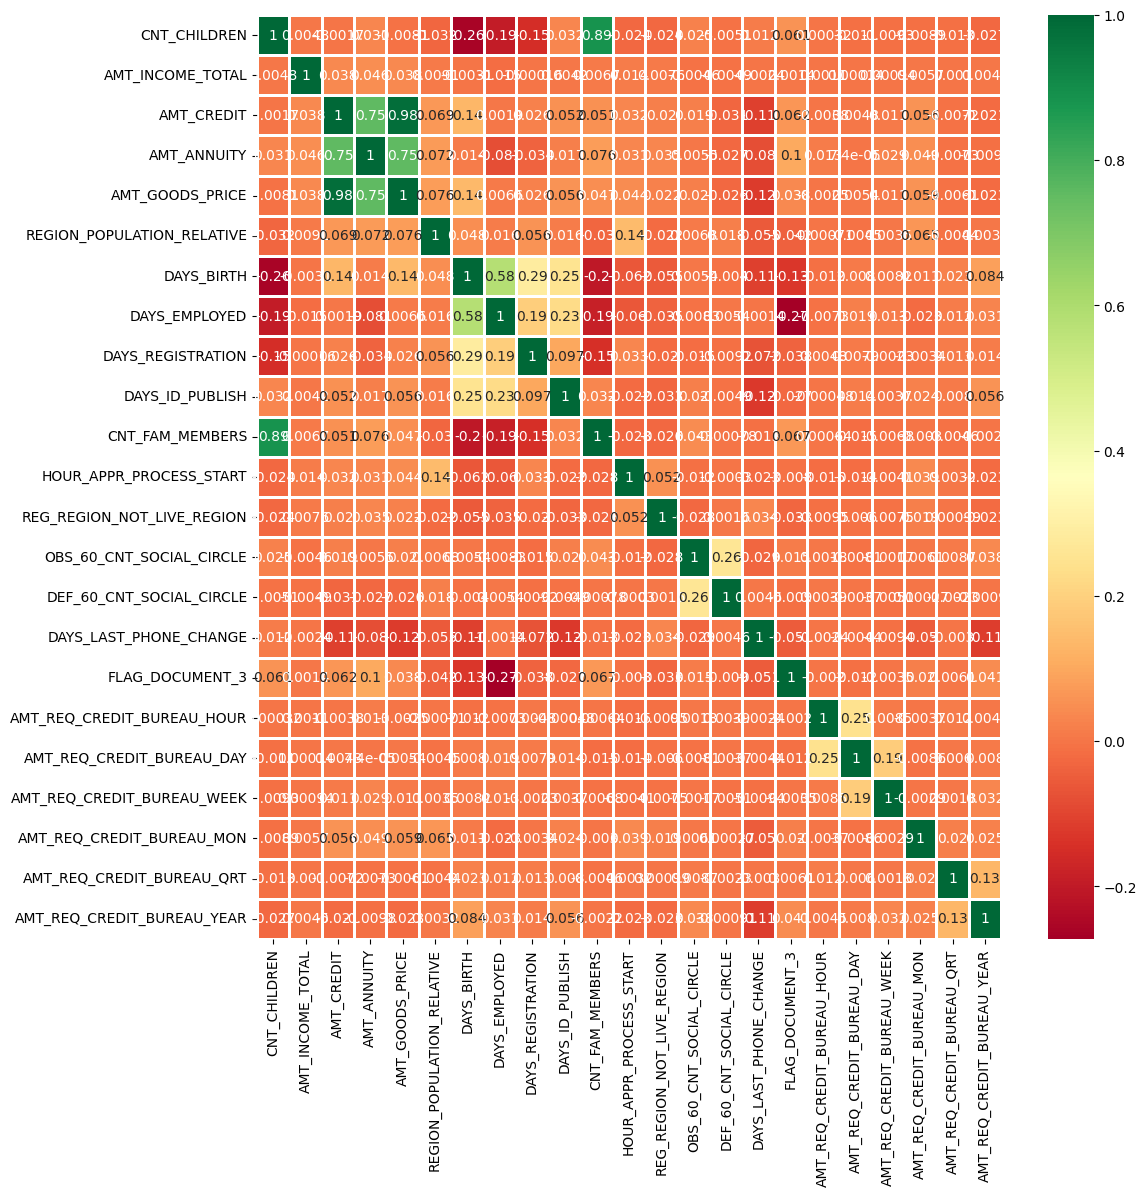

In [128]:
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(Defaulter_df.corr(), cmap="RdYlGn",annot=True,linewidth =1)

<b>Inferences:</b>

1. AMT_CREDIT amount is highly correlated with AMOUNT_GOODS_PRICE same as repayers repayers.

2. AMT_ANNUITY correlation with AMT_CREDIT slightly reduced in defaulters to (0.75) compared to repayers(0.77)

3. Observe high correlation in repayers for number of DAYS_EMPLOYED(0.62) when compared to defaulters(0.58).

4. Correlation drop between AMT_INCOME_TOTAL of the client and the AMT_CREDIT(0.038) amongst defaulters whereas it is 0.342 among repayers.

5. DAYS_BIRTH and CNT_CHILDREN correlation drops to 0.259 in defaulters when compared to 0.337 in repayers.

6. There is a slight increase in OBS_60_CNT_SOCIAL_CIRCLE for defaulters(0.264) compared to repayers(0.254)

<a id = "3d"></a><br>

### Numerical Univariate Analysis 

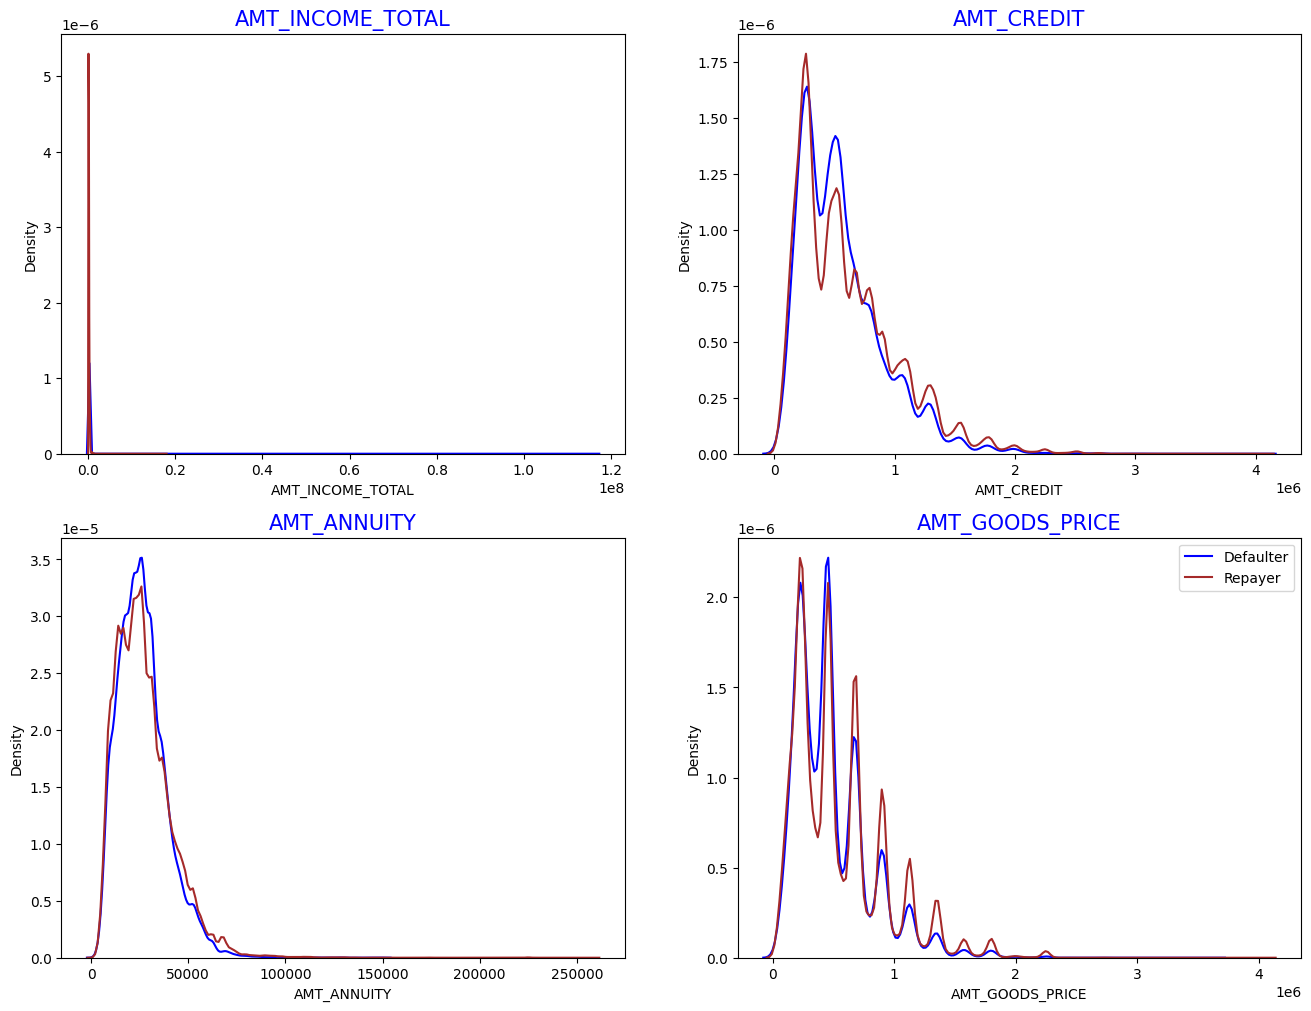

In [129]:
# Plotting the numerical columns related to amount as distribution plot to see density
amount = application_df[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']]

fig = plt.figure(figsize=(16,12))

for i in enumerate(amount):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(Defaulter_df[i[1]], hist=False, color='Blue',label ="Defaulter")
    sns.distplot(Repayer_df[i[1]], hist=False, color='Brown', label ="Repayer")
    plt.title(i[1], fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    
plt.legend()

plt.show() 

<b>Inferences:<b>

1. Most no of loans are given for goods price below 10 lakhs

2. Most people pay annuity below 50000 for the credit loan

3. Credit amount of the loan is mostly less then 10 lakhs

4. Repayers and Defaulters distribution overlap in all the plots, so these variable cannot be used make a decision.

<a id = "3e"></a><br>

### Numerical Bivariate Analysis

<Figure size 1500x600 with 0 Axes>

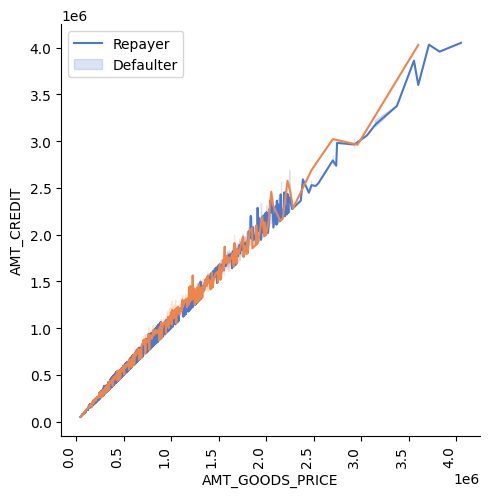

In [130]:
# Checking the relationship between Goods price and credit and comparing with loan repayment staus
bivariate_rel('AMT_GOODS_PRICE','AMT_CREDIT',application_df,"TARGET", "line", ['Blue','Brown'], False,(15,6))

#### Inferences:
When the credit amount goes beyond 3M, there is an increase in defaulters.

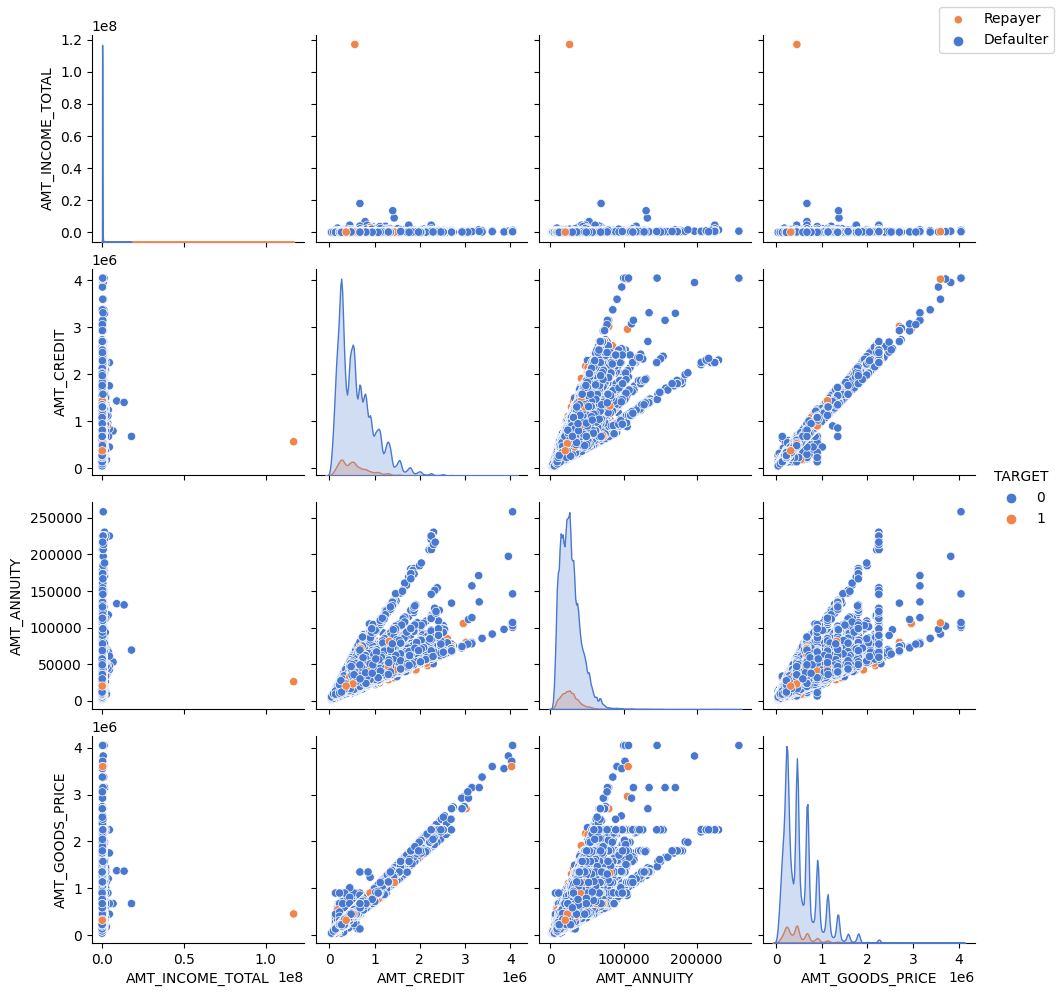

In [131]:
# Plotting pairplot between amount variable to draw reference against loan repayment status
amount = application_df[[ 'AMT_INCOME_TOTAL','AMT_CREDIT',
                         'AMT_ANNUITY', 'AMT_GOODS_PRICE','TARGET']]
amount = amount[(amount["AMT_GOODS_PRICE"].notnull()) & (amount["AMT_ANNUITY"].notnull())]
ax= sns.pairplot(amount,hue="TARGET",palette="muted")
ax.fig.legend(labels=['Repayer','Defaulter'])
plt.show()

### Inferences:
When AMT_ANNUITY is >15000 AMT_GOODS_PRICE is > 3M, there is lesser probability of defaulters

AMT_CREDIT and AMT_GOODS_PRICE are highly correlated as based on the scatterplot where most of the data are consolidated in form of a line

There are very less defaulters for AMT_CREDIT >3M

Inferences related to distribution plot has been already mentioned in previous distplot graphs inferences section

<a id = "3f"></a><br>


## Merged Dataframes Analysis

In [132]:
#merge both the dataframe on SK_ID_CURR with Inner Joins
loan_process_df = pd.merge(application_df, previous_df, how='inner', on='SK_ID_CURR')
loan_process_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               N             0          270000.0     1293502.5   
3               N             0          270000.0     1293502.5   
4               Y             0           67500.0      135000.0   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0        24700.5           351000.0   Unaccompanied          Working   
1        35698.5          1129500.0          Family    State servant   
2        35698.5          1129500.0          Family    State servant   
3        35698.5          1129500.0          Family    State servant   
4         6750.0           135000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.003541       16765           1188             1186.0   
3                    0.003541       16765           1188             1186.0   
4                    0.010032       19046            225             4260.0   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS REGION_RATING_CLIENT  \
0             2120        Laborers              1.0                    2   
1              291      Core staff              2.0                    1   
2              291      Core staff              2.0                    1   
3              291      Core staff              2.0                    1   
4             2531        Laborers              1.0                    2   

  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                           2                  WEDNESDAY   
1                           1                     MONDAY   
2                           1                     MONDAY   
3                           1                     MONDAY   
4                           2                     MONDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                       11                           0   
3                       11                           0   
4                        9                           0   

  REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION  \
0                          0                           0   
1                          0                           0   
2                          0                           0   
3                          0                           0   
4                          0                           0   

  REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY  \
0                      0                      0                       0   
1                      0                      0                       0   
2                      0                      0  

In [133]:
#Checking the details of the merged dataframe
loan_process_df.shape

(1413701, 74)

In [134]:
# Checking the element count of the dataframe
loan_process_df.size

104613874

In [135]:
# checking the columns and column types of the dataframe
loan_process_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 74 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1413701 non-null  int64   
 1   TARGET                       1413701 non-null  int64   
 2   NAME_CONTRACT_TYPE_x         1413701 non-null  category
 3   CODE_GENDER                  1413701 non-null  category
 4   FLAG_OWN_CAR                 1413701 non-null  category
 5   FLAG_OWN_REALTY              1413701 non-null  category
 6   CNT_CHILDREN                 1413701 non-null  int64   
 7   AMT_INCOME_TOTAL             1413701 non-null  float64 
 8   AMT_CREDIT_x                 1413701 non-null  float64 
 9   AMT_ANNUITY_x                1413608 non-null  float64 
 10  AMT_GOODS_PRICE_x            1412493 non-null  float64 
 11  NAME_TYPE_SUITE              1413701 non-null  category
 12  NAME_INCOME_TYPE            

In [136]:
# Checking merged dataframe numerical columns statistics
loan_process_df.describe()

SK_ID_CURR        TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  1.413701e+06  1.413701e+06  1.413701e+06      1.413701e+06   
mean   2.784813e+05  8.655296e-02  4.048933e-01      1.733160e+05   
std    1.028118e+05  2.811789e-01  7.173454e-01      1.985734e+05   
min    1.000020e+05  0.000000e+00  0.000000e+00      2.565000e+04   
25%    1.893640e+05  0.000000e+00  0.000000e+00      1.125000e+05   
50%    2.789920e+05  0.000000e+00  0.000000e+00      1.575000e+05   
75%    3.675560e+05  0.000000e+00  1.000000e+00      2.070000e+05   
max    4.562550e+05  1.000000e+00  1.900000e+01      1.170000e+08   

       AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  \
count  1.413701e+06   1.413608e+06       1.412493e+06   
mean   5.875537e+05   2.701702e+04       5.277186e+05   
std    3.849173e+05   1.395116e+04       3.532465e+05   
min    4.500000e+04   1.615500e+03       4.050000e+04   
25%    2.700000e+05   1.682100e+04       2.385000e+05   
50%    5.084955e+05   2.492550e+04       4.500000e+05   
75%    8.079840e+05   3.454200e+04       6.795000e+05   
max    4.050000e+06   2.250000e+05       4.050000e+06   

       REGION_POPULATION_RELATIVE    DAYS_BIRTH  DAYS_EMPLOYED  \
count                1.413701e+06  1.413701e+06   1.413701e+06   
mean                 2.074985e-02  1.632105e+04   7.266347e+04   
std                  1.334702e-02  4.344557e+03   1.433374e+05   
min                  2.900000e-04  7.489000e+03   0.000000e+00   
25%                  1.003200e-02  1.273900e+04   1.042000e+03   
50%                  1.885000e-02  1.604400e+04   2.401000e+03   
75%                  2.866300e-02  1.998000e+04   6.313000e+03   
max                  7.250800e-02  2.520100e+04   3.652430e+05   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  \
count       1.413701e+06     1.413701e+06     1.413701e+06   
mean        5.003233e+03     3.034563e+03     2.150501e+00   
std         3.551051e+03     1.507376e+03     9.006787e-01   
min         0.000000e+00     0.000000e+00     1.000000e+00   
25%         2.001000e+03     1.783000e+03     2.000000e+00   
50%         4.508000e+03     3.330000e+03     2.000000e+00   
75%         7.510000e+03     4.319000e+03     3.000000e+00   
max         2.467200e+04     7.197000e+03     2.000000e+01   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
count             1.413701e+06                1.413701e+06   
mean              1.198433e+01                1.207327e-02   
std               3.232181e+00                1.092132e-01   
min               0.000000e+00                0.000000e+00   
25%               1.000000e+01                0.000000e+00   
50%               1.200000e+01                0.000000e+00   
75%               1.400000e+01                0.000000e+00   
max               2.300000e+01                1.000000e+00   

       OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
count              1.410555e+06              1.410555e+06   
mean               1.544176e+00              1.540436e-01   
std                2.530715e+00              4.658973e-01   
min                0.000000e+00              0.000000e+00   
25%                0.000000e+00              0.000000e+00   
50%                0.000000e+00              0.000000e+00   
75%                2.000000e+00              0.000000e+00   
max                3.480000e+02              3.400000e+01   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
count              1.410555e+06              1.410555e+06   
mean               1.526303e+00              1.080426e-01   
std                2.508953e+00              3.790588e-01   
min                0.000000e+00              0.000000e+00   
25%                0.000000e+00              0.000000e+00   
50%                0.000000e+00              0.000000e+00   
75%                2.000000e+00              0.000000e+00   
max                3.440000e+02              2.400000e+01   

       DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CRED

In [137]:
# Bifurcating the applicationDF dataframe based on Target value 0 and 1 for correlation and other analysis

L0 = loan_process_df[loan_process_df['TARGET']==0] # Repayers
L1 = loan_process_df[loan_process_df['TARGET']==1] # Defaulters

<a id = "3g"></a><br>

## Univariate Analysis for Merged Data set

### Plotting Contract Status vs purpose of the loan:

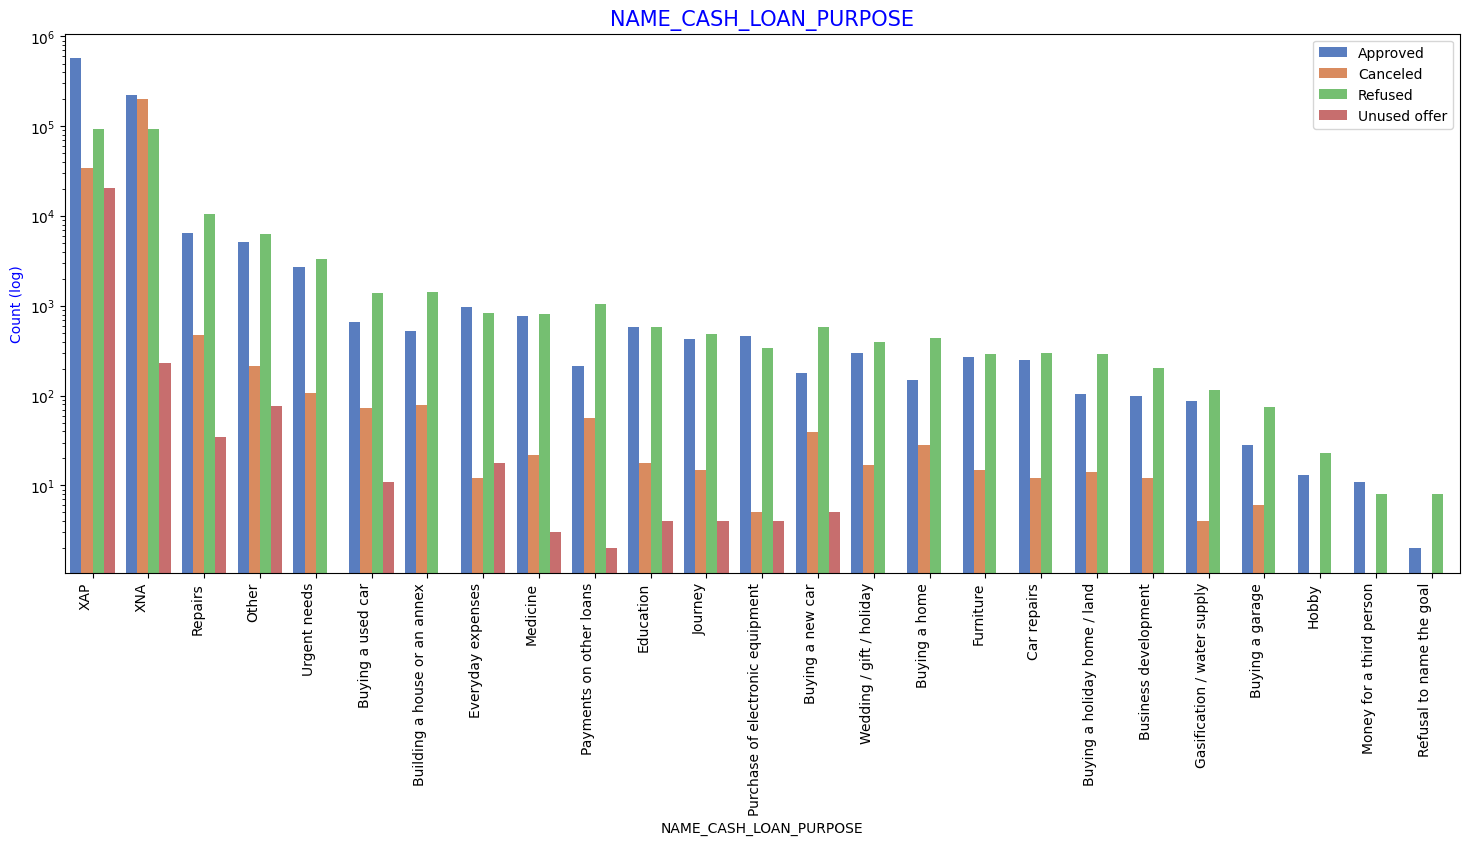

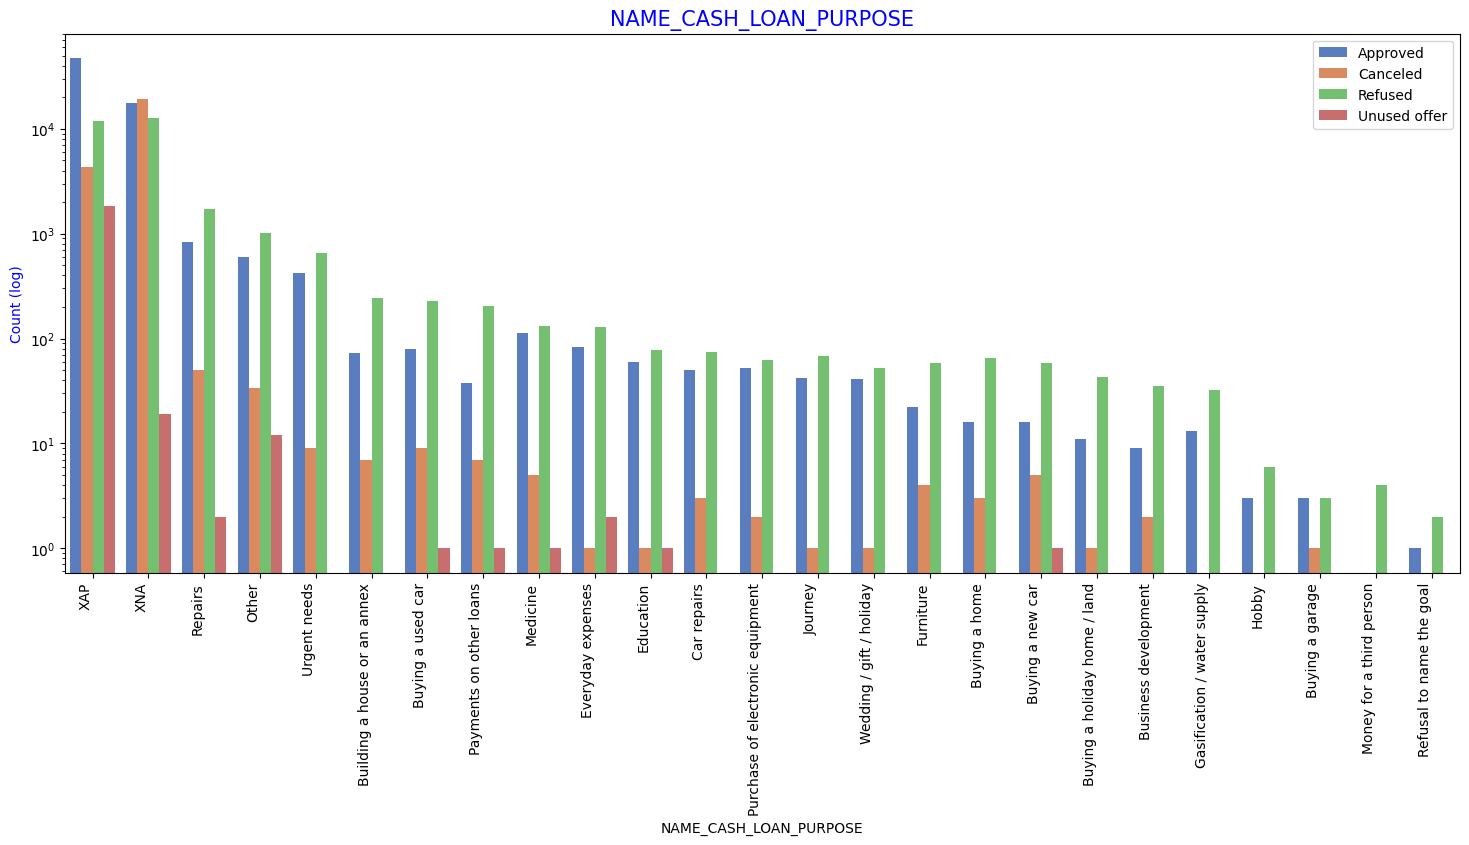

In [183]:
univariate_merged("NAME_CASH_LOAN_PURPOSE",L0,"NAME_CONTRACT_STATUS","muted",True,(18,7))

univariate_merged("NAME_CASH_LOAN_PURPOSE",L1,"NAME_CONTRACT_STATUS","muted",True,(18,7))

### Inferences:

1. Loan purpose has high number of unknown values (XAP, XNA)

2. Loan taken for the purpose of Repairs seems to have highest default rate

3. A very high number application have been rejected by bank or refused by client which has purpose as repair or other. This shows that purpose repair is taken as high risk by bank and either they are rejected or bank offers very high loan interest rate which is not feasible by the clients, thus they refuse the loan.

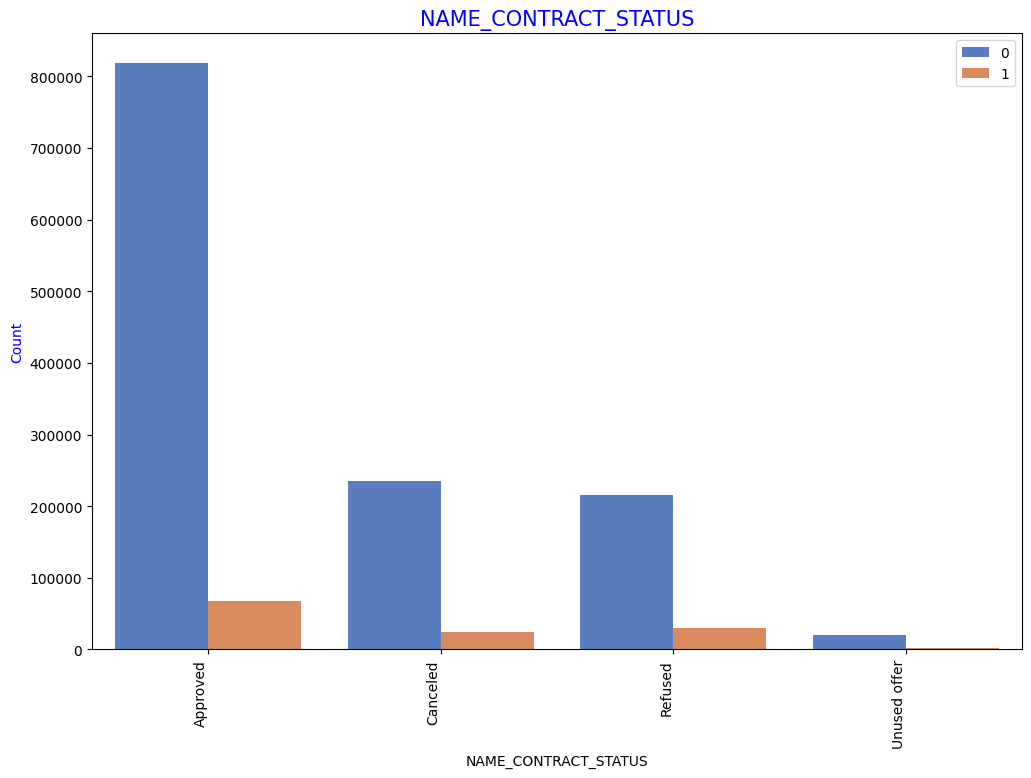

                             Counts Percentage
NAME_CONTRACT_STATUS TARGET                   
Approved             0       818856     92.41%
                     1        67243      7.59%
Canceled             0       235641     90.83%
                     1        23800      9.17%
Refused              0       215952      88.0%
                     1        29438      12.0%
Unused offer         0        20892     91.75%
                     1         1879      8.25%


In [182]:
# Checking the Contract Status based on loan repayment status and whether there is any business loss or financial loss
univariate_merged("NAME_CONTRACT_STATUS",loan_process_df,"TARGET","muted",False,(12,8))
g = loan_process_df.groupby("NAME_CONTRACT_STATUS")["TARGET"]
df1 = pd.concat([g.value_counts(),round(g.value_counts(normalize=True).mul(100),2)],axis=1, keys=('Counts','Percentage'))
df1['Percentage'] = df1['Percentage'].astype(str) +"%" # adding percentage symbol in the results for understanding
print (df1)

### Inferences:
90% of the previously cancelled client have actually repayed the loan. Revisiting the interest rates would increase business opoortunity for these clients

88% of the clients who have been previously refused a loan has payed back the loan in current case.

Refual reason should be recorded for further analysis as these clients would turn into potential repaying customer.

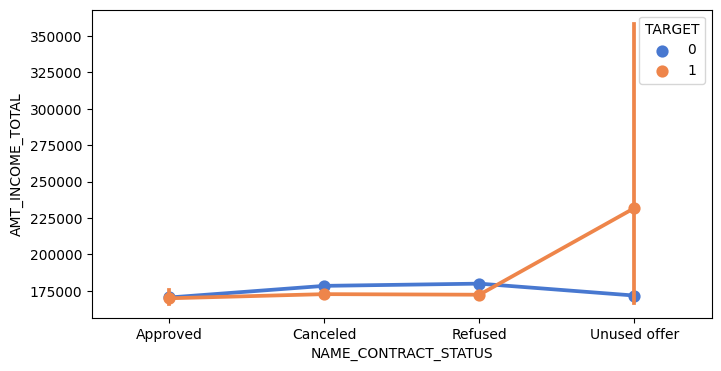

In [140]:
# plotting the relationship between income total and contract status
merged_pointplot("NAME_CONTRACT_STATUS",'AMT_INCOME_TOTAL')

### Inferences:
The point plot show that the people who have not used offer earlier have defaulted even when there average income is higher than others

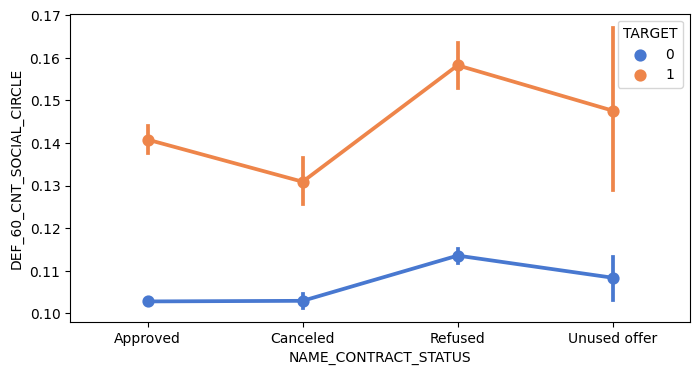

In [141]:
# plotting the relationship between people who defaulted in last 60 days being in client's social circle and contact status
merged_pointplot("NAME_CONTRACT_STATUS",'DEF_60_CNT_SOCIAL_CIRCLE')

### Inferences:
Clients who have average of 0.13 or higher DEF_60_CNT_SOCIAL_CIRCLE score tend to default more and hence client's social circle has to be analysed before providing the loan.

<a id = "4"></a><br>

## Conclusions

After analysing the datasets, there are few attributes of a client with which the bank would be able to identify if they will repay the loan or not. The analysis is consised as below with the contributing factors and categorization:

<a id = "4a"></a><br>
### Factors to conclude applicant will be a Repayer:

1. NAME_EDUCATION_TYPE: Academic degree has less defaults.
2. NAME_INCOME_TYPE: Student and Businessmen have no defaults.
3. REGION_RATING_CLIENT: RATING 1 is safer.
4. ORGANIZATION_TYPE: Clients with Trade Type 4 and 5 and Industry type 8 have defaulted less than 3%
5. DAYS_BIRTH: People above age of 50 have low probability of defaulting
6. DAYS_EMPLOYED: Clients with 40+ year experience having less than 1% default rate
7. AMT_INCOME_TOTAL:Applicant with Income more than 700,000 are less likely to default
8. NAME_CASH_LOAN_PURPOSE: Loans bought for Hobby, Buying garage are being repayed mostly.
9. CNT_CHILDREN: People with zero to two children tend to repay the loans.

<a id = "4b"></a><br>
### Factors to conclude applicant will be a Defaulter:
1. CODE_GENDER: Men are at relatively higher default rate
2. NAME_FAMILY_STATUS : People who have civil marriage or who are single default a lot.
3. NAME_EDUCATION_TYPE: People with Lower Secondary & Secondary education
4. NAME_INCOME_TYPE: Clients who are either at Maternity leave OR Unemployed default a lot.
5. REGION_RATING_CLIENT: People who live in Rating 3 has highest defaults.
6. OCCUPATION_TYPE: Avoid Low-skill Laborers, Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff as the default rate is huge.
7. ORGANIZATION_TYPE: Organizations with highest percent of loans not repaid are Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%) and Restaurant (less than 12%). Self-employed people have relative high defaulting rate, and thus should be avoided to be approved for loan or provide loan with higher interest rate to mitigate the risk of defaulting.
8. DAYS_BIRTH: Avoid young people who are in age group of 20-40 as they have higher probability of defaulting
9. DAYS_EMPLOYED: People who have less than 5 years of employment have high default rate.
10. CNT_CHILDREN & CNT_FAM_MEMBERS: Client who have children equal to or more than 9 default 100% and hence their applications are to be rejected.
11. AMT_GOODS_PRICE: When the credit amount goes beyond 3M, there is an increase in defaulters.

The following attributes indicate that people from these category tend to default but then due to the number of people and the amount of loan, the bank could provide loan with higher interest to mitigate any default risk thus preventing business loss:

1. NAME_HOUSING_TYPE: High number of loan applications are from the category of people who live in Rented apartments & living with parents and hence offering the loan would mitigate the loss if any of those default.
2. AMT_CREDIT: People who get loan for 300-600k tend to default more than others and hence having higher interest specifically for this credit range would be ideal.
3. AMT_INCOME: Since 90% of the applications have Income total less than 300,000 and they have high probability of defaulting, they could be offered loan with higher interest compared to other income category.
4. CNT_CHILDREN & CNT_FAM_MEMBERS: Clients who have 4 to 8 children has a very high default rate and hence higher interest should be imposed on their loans.
5. NAME_CASH_LOAN_PURPOSE: Loan taken for the purpose of Repairs seems to have highest default rate. A very high number applications have been rejected by bank or refused by client in previous applications as well which has purpose as repair or other. This shows that purpose repair is taken as high risk by bank and either they are rejected, or bank offers very high loan interest rate which is not feasible by the clients, thus they refuse the loan. The same approach could be followed in future as well.

#### Other suggestions:
90% of the previously cancelled client have actually repayed the loan. Record the reason for cancellation which might help the bank to determine and negotiate terms with these repaying customers in future for increase business opportunity.
88% of the clients who were refused by bank for loan earlier have now turned into a repaying client. Hence documenting the reason for rejection could mitigate the business loss and these clients could be contacted for further loans.

Contact Details:

WhatsApp : +2347065093865
Email : davoazorji1@gmail.com